## Imports:

In [1]:
#%% Imports

# Basic Imports 
import numpy as np
import pandas as pd

# Plotting Imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from networkx import DiGraph
import networkx as nx
import statistics
from itertools import permutations
from itertools import combinations #no longer being used
from itertools import product #temporarily being used!
from IPython import display

# Original Dataset:

## Reading in the Original Datafile:

In [2]:
dfOG = pd.read_csv('geneDiseaseNetwork.tsv', sep = "\t")
dfOG

/mnt/home/f0102402/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,NID,diseaseNID,geneNID,source,association,associationType,sentence,pmid,score,EL,EI,year
0,1130681,2107,793,BEFREE,NaN,Biomarker,No correlation could be found between Broder's...,1000501.0,0.10,NaN,0.956175,1976.0
1,261998,431,775,BEFREE,NaN,GeneticVariation,"However, there are few reports describing soma...",10021299.0,0.40,NaN,0.987013,1999.0
2,369637,450,775,BEFREE,NaN,GeneticVariation,WAF1 genotype and endometrial cancer susceptib...,10021299.0,0.02,NaN,1.000000,1999.0
3,2128526,10033,775,BEFREE,NaN,GeneticVariation,WAF1 genotype and endometrial cancer susceptib...,10021299.0,0.07,NaN,1.000000,1999.0
4,262799,431,7385,BEFREE,NaN,Biomarker,APC and APC2 may therefore have comparable fun...,10021369.0,0.01,NaN,1.000000,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3261319,3261082,30235,1698,ORPHANET,NaN,ChromosomalRearrangement,NaN,NaN,0.30,NaN,NaN,NaN
3261320,3261111,30244,4952,CLINVAR,NaN,GeneticVariation,NaN,NaN,0.20,NaN,1.000000,NaN
3261321,3261162,30255,5756,GENOMICS_ENGLAND,NaN,Biomarker,NaN,NaN,0.30,strong,NaN,NaN
3261322,3261163,30255,5756,GENOMICS_ENGLAND,NaN,Biomarker,NaN,NaN,0.30,strong,NaN,NaN


In [3]:
#Checking For Missing Values:
dfOG.isnull().sum()

NID                      0
diseaseNID               0
geneNID                  0
source                   0
association        3173096
associationType          0
sentence            203437
pmid                203434
score                    0
EL                 3121898
EI                  170896
year                203434
dtype: int64

In [4]:
dfOG['source'].unique()

array(['BEFREE', 'MGD', 'UNIPROT', 'CTD_human', 'RGD', 'CLINVAR',
       'CLINGEN', 'GENOMICS_ENGLAND', 'ORPHANET', 'PSYGENET', 'LHGDN',
       'CTD_mouse', 'GWASDB', 'GWASCAT', 'CTD_rat', 'HPO', 'CGI'],
      dtype=object)

In [5]:
dfOG['associationType'].unique()

array(['Biomarker', 'GeneticVariation', 'AlteredExpression',
       'PosttranslationalModification', 'CausalMutation',
       'ChromosomalRearrangement', 'GermlineCausalMutation',
       'Therapeutic', 'ModifyingMutation', 'SusceptibilityMutation',
       'SomaticCausalMutation', 'FusionGene', 'GermlineModifyingMutation',
       'GenomicAlterations'], dtype=object)

## Hierarchy of Association Types:
Image taken from https://www.disgenet.org/dbinfo

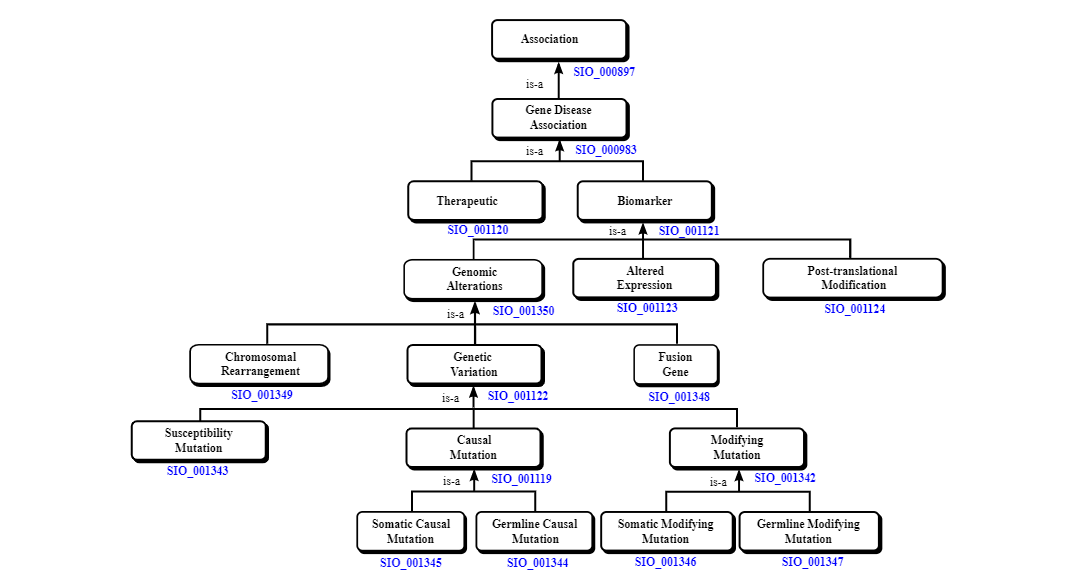

In [6]:
display.Image("./hierarchy.PNG")

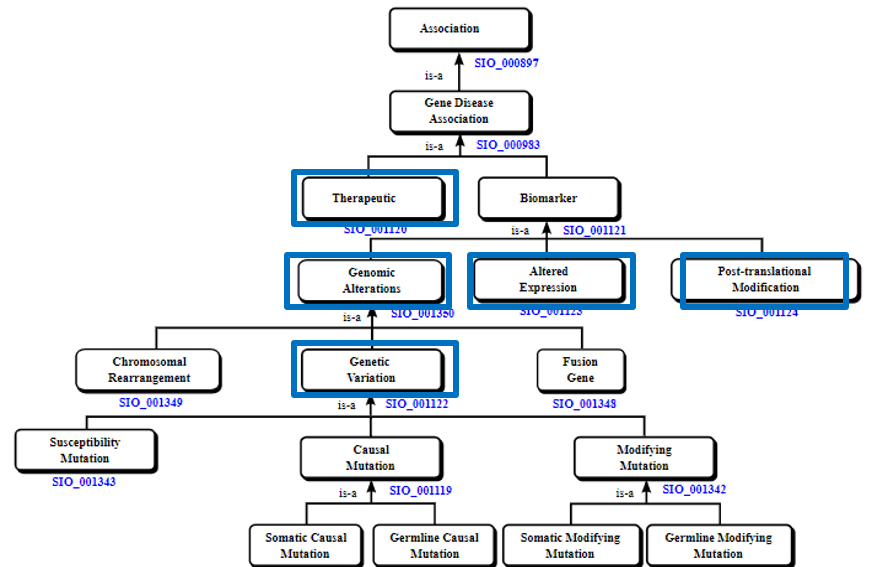

In [29]:
# Categories to keep for recategorization:
display.Image("./hierarchyRecategorized.PNG")

## Dataset with diseaseNID, geneNID, and associationType:

In [6]:
threeCol = pd.read_csv('threeCols.csv')
threeCol

,diseaseNID,geneNID,associationType
0,1,1088,Biomarker
1,1,3070,Biomarker
2,2,10721,Biomarker
3,3,2680,Biomarker
4,3,10946,Biomarker
...,...,...,...
3261319,30292,3829,GeneticVariation
3261320,30292,1738,Biomarker
3261321,30292,1738,Biomarker
3261322,30293,6353,Biomarker


In [7]:
# Dataset with diseaseNID, associationType, and log of Counts of Genes per Disease by Association Type:
logSumDisease = sumdisease.copy()
logSumDisease['Counts of Genes per Disease by Association Type'] = np.log10(logSumDisease['Counts of Genes per Disease by Association Type'])
logSumDisease

NameError: name 'sumdisease' is not defined

## Boxplot of Log of Counts of Genes per Disease for each Association Type:

In [ ]:
fig, ax = plt.subplots(figsize = (12,15))
sns.boxplot(y = 'associationType', x = 'Counts of Genes per Disease by Association Type',
                 data = logSumDisease, palette="Set3", orient = 'h')

Overall, this boxplot (and the one below) does not tell us much useful information. Those association types with a greater median have more genes associated to the specific diseases then some other association types. One can notice that the association types that are more general and more encompassing have the larger medians (Biomaker, Altered Experession, Genetic variation, Therapeutic, Genomic Alterations, Posttranslational Modification). They also have the larger number of outliers, suggesting they have encompass a larger number of diseases that have unusually large genes associated to certain diseases. From this, we can determine that it would be better to re-categorize the data so that we have five to six main association Types rather than fourteen. 

In [ ]:
# Dataset with Fraction of Genes for a Disease per Association Type:
sumdisease2 = threeCol.groupby(by = ['diseaseNID']).size().sort_values(ascending=False).reset_index(name = 'Counts of Diseases')
result = sumdisease.merge(sumdisease2)
result['Ratio'] = result['Counts of Genes per Disease by Association Type']/result['Counts of Diseases']
result

## Boxplot of Fraction of Genes for a Disease per Association Type:

In [ ]:
fig, ax = plt.subplots(figsize = (12,15))
sns.boxplot(y = 'associationType', x = 'Ratio',
                 data = result, palette="Set3", orient = 'h')

Like the other boxplot above, this boxplot does not tell as much useful information, but it does help us to better understand our dataset. For each association type, the fraction of genes for a disease divided by all genes for an association Type is displayed in a box plot format. One could see for the Biomarker association type, for example, that there is a much larger percentage of genes associated to each disease than compared to some smaller categories. Looking at Posttranslational Modification, Genomic Alterations, and/or Modifying Mutations, the boxplot is extremely small, suggesting that the diseases for each association type have very similar gene sets. All three of these all contain a lot of outliers as well. One can also see that almost every association type contains at least one disease that has the entire gene set associated to it. For many of the boxplots, these diseases are considered outliers. The Chromosomal Rearrangement boxplot is also intriguing due to the broadness of its graph. This suggests that the size of the gene sets for diseases contain much variance. Understanding the reasoning behing this relationship (as well as the relations for the other association types) is important for this research project. 

## Gene Comparison and Exploration:

In [8]:
# Creating Gene Sets for Each Association Type Based on Disease:
a = threeCol.groupby(by = ['diseaseNID', 'associationType'])['geneNID'].apply(lambda x: set(x))
a = a.reset_index()
a

,diseaseNID,associationType,geneNID
0,1,Biomarker,"{1088, 3070}"
1,2,Biomarker,{10721}
2,3,Biomarker,"{522, 525, 7694, 5650, 11283, 5139, 12826, 156..."
3,3,CausalMutation,"{3065, 5458, 1813}"
4,3,GeneticVariation,"{6417, 17182, 4711}"
...,...,...,...
67784,30291,GeneticVariation,{5241}
67785,30292,AlteredExpression,"{3833, 11963, 2493, 270}"
67786,30292,Biomarker,"{18471, 1738, 9805, 46, 270, 19792, 6738, 3829..."
67787,30292,GeneticVariation,"{2403, 1738, 9805, 270, 6738, 3829, 4057}"


In [9]:
# Creating Sets of association Types Based on Disease
a2 = a.groupby(by = ['diseaseNID'])['associationType'].apply(lambda x: set(x))
a2 = a2.to_frame().reset_index()
a2

,diseaseNID,associationType
0,1,{Biomarker}
1,2,{Biomarker}
2,3,"{Biomarker, GeneticVariation, CausalMutation}"
3,4,{Biomarker}
4,5,"{Biomarker, GeneticVariation, AlteredExpression}"
...,...,...
30165,30289,{GeneticVariation}
30166,30290,"{CausalMutation, GeneticVariation, GermlineCau..."
30167,30291,{GeneticVariation}
30168,30292,"{Biomarker, GeneticVariation, AlteredExpression}"


In [10]:
# Creating the Different Possible Combinations of Association Types for Each Disease:
#a2['combinations'] = a2['associationType'].apply(lambda r: list(product(r,2)))
a2['combinations'] = a2['associationType'].apply(lambda r: list(product(r,repeat = 2)))

In [11]:
# Removing the Diseases that Only Hold One Association Type:
a3 = a2[a2['combinations'].map(lambda d: len(d)) > 0]
a3

,diseaseNID,associationType,combinations
0,1,{Biomarker},"[(Biomarker, Biomarker)]"
1,2,{Biomarker},"[(Biomarker, Biomarker)]"
2,3,"{Biomarker, GeneticVariation, CausalMutation}","[(Biomarker, Biomarker), (Biomarker, GeneticVa..."
3,4,{Biomarker},"[(Biomarker, Biomarker)]"
4,5,"{Biomarker, GeneticVariation, AlteredExpression}","[(Biomarker, Biomarker), (Biomarker, GeneticVa..."
...,...,...,...
30165,30289,{GeneticVariation},"[(GeneticVariation, GeneticVariation)]"
30166,30290,"{CausalMutation, GeneticVariation, GermlineCau...","[(CausalMutation, CausalMutation), (CausalMuta..."
30167,30291,{GeneticVariation},"[(GeneticVariation, GeneticVariation)]"
30168,30292,"{Biomarker, GeneticVariation, AlteredExpression}","[(Biomarker, Biomarker), (Biomarker, GeneticVa..."


In [12]:
# Making a Separate Row for Each Combination:
resultGE = pd.DataFrame([(c, tup.diseaseNID) for tup in a3.itertuples() for c in tup.combinations])
resultGE = resultGE.rename(columns={0: 'Combos', 1: 'diseaseNID'})

In [13]:
# Separating the Created Combinations into 2 Columns:
resultGE[['associationType1','associationType2']] = pd.DataFrame(resultGE.Combos.tolist(), index= resultGE.index)

In [14]:
resultGE['geneNID1'] = np.nan
resultGE['geneNID2'] = np.nan

In [15]:
arowList = []
arow2List = []
for index, row in resultGE.iterrows():
    midrow = a.loc[(a['diseaseNID'] == row['diseaseNID']) & (a['associationType'] == row['associationType1'])]
    arowList.append(midrow.iloc[0]['geneNID'])
    
    midrow2 = a.loc[(a['diseaseNID'] == row['diseaseNID']) & (a['associationType'] == row['associationType2'])]
    arow2List.append(midrow2.iloc[0]['geneNID'])

In [16]:
resultGE['geneNID1'] = arowList
resultGE['geneNID2'] = arow2List
resultGE = resultGE.drop(columns = ['Combos'])
resultGE['jaccardIndex'] = np.nan

In [17]:
# Jaccard Similarity Coefficient/Jaccard Index Function:
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [18]:
def f(x):
    return jaccard(x['geneNID1'], x['geneNID2']) 

In [19]:
resultGE['jaccardIndex'] = resultGE.apply(f, axis = 1)
resultGE
#THIS TABLE CAN BE ACCESSED EASIER USING:
#geneSetComparison = pd.read_csv('finalenew.csv')

,diseaseNID,associationType1,associationType2,geneNID1,geneNID2,jaccardIndex
0,1,Biomarker,Biomarker,"{1088, 3070}","{1088, 3070}",1.000000
1,2,Biomarker,Biomarker,{10721},{10721},1.000000
2,3,Biomarker,Biomarker,"{522, 525, 7694, 5650, 11283, 5139, 12826, 156...","{522, 525, 7694, 5650, 11283, 5139, 12826, 156...",1.000000
3,3,Biomarker,GeneticVariation,"{522, 525, 7694, 5650, 11283, 5139, 12826, 156...","{6417, 17182, 4711}",0.010000
4,3,Biomarker,CausalMutation,"{522, 525, 7694, 5650, 11283, 5139, 12826, 156...","{3065, 5458, 1813}",0.000000
...,...,...,...,...,...,...
203102,30292,GeneticVariation,AlteredExpression,"{2403, 1738, 9805, 270, 6738, 3829, 4057}","{3833, 11963, 2493, 270}",0.100000
203103,30292,AlteredExpression,Biomarker,"{3833, 11963, 2493, 270}","{18471, 1738, 9805, 46, 270, 19792, 6738, 3829...",0.058824
203104,30292,AlteredExpression,GeneticVariation,"{3833, 11963, 2493, 270}","{2403, 1738, 9805, 270, 6738, 3829, 4057}",0.100000
203105,30292,AlteredExpression,AlteredExpression,"{3833, 11963, 2493, 270}","{3833, 11963, 2493, 270}",1.000000


## Boxplots for Gene Exploration:

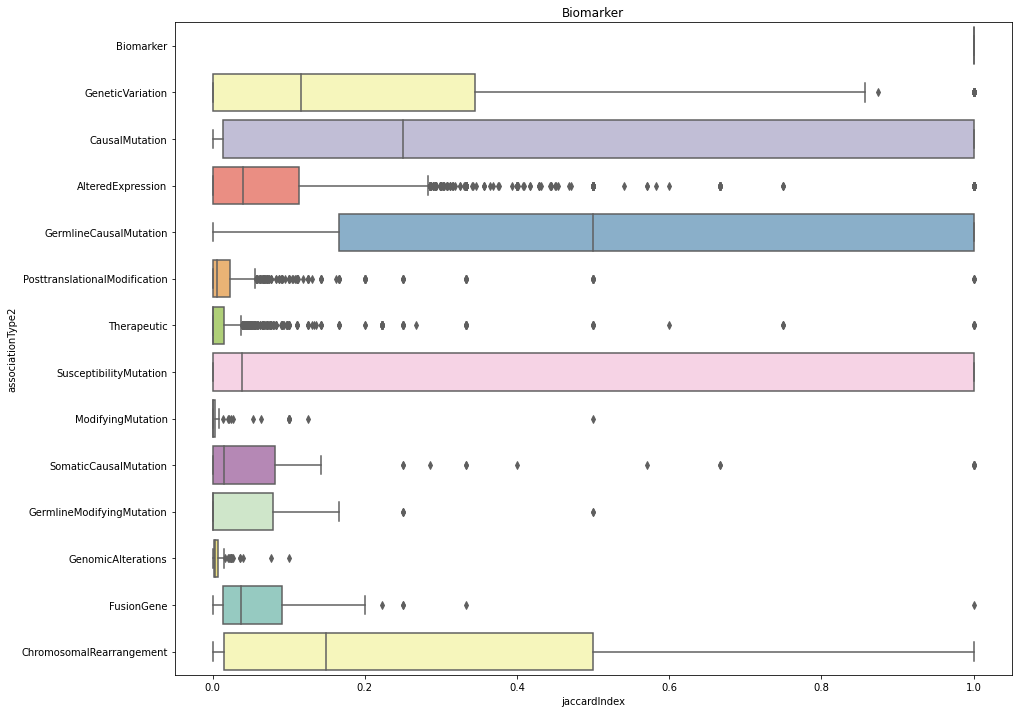

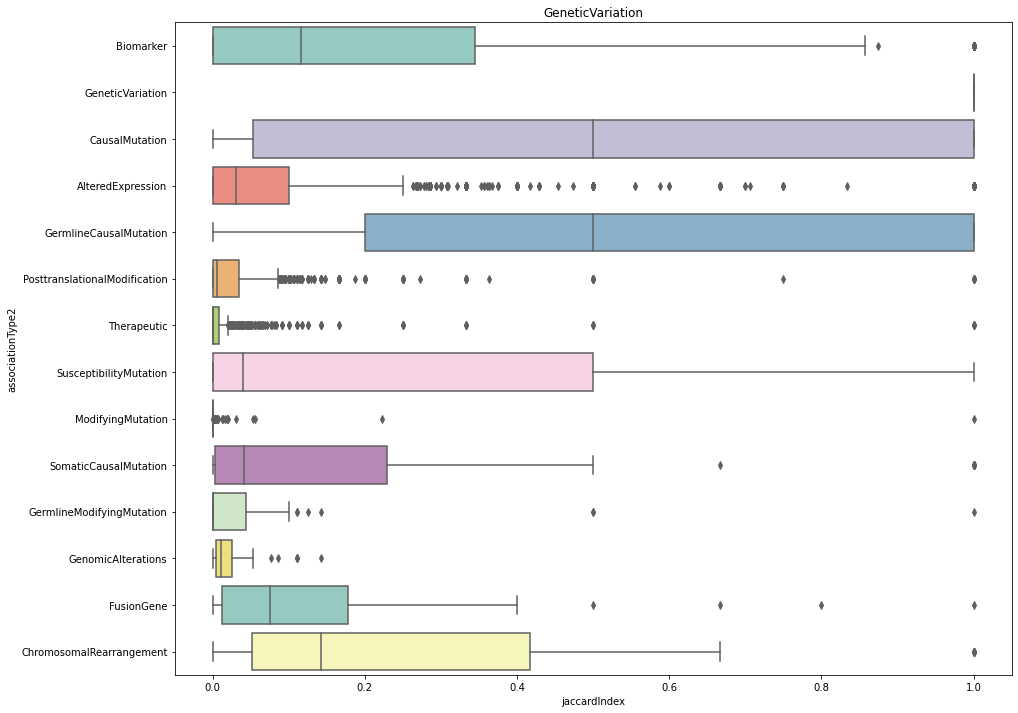

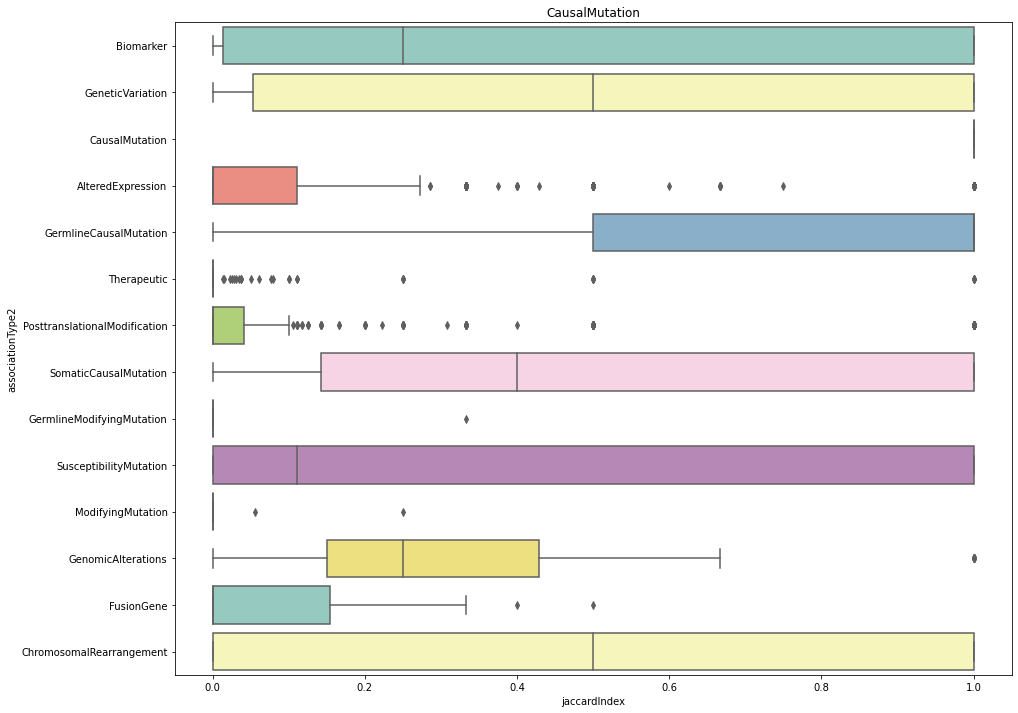

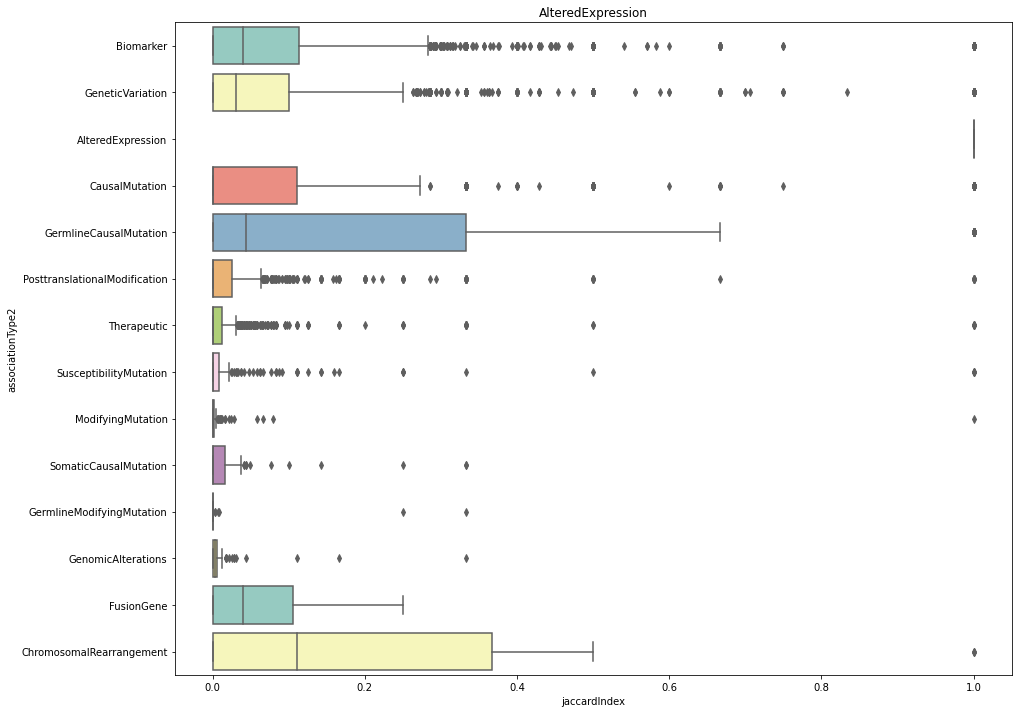

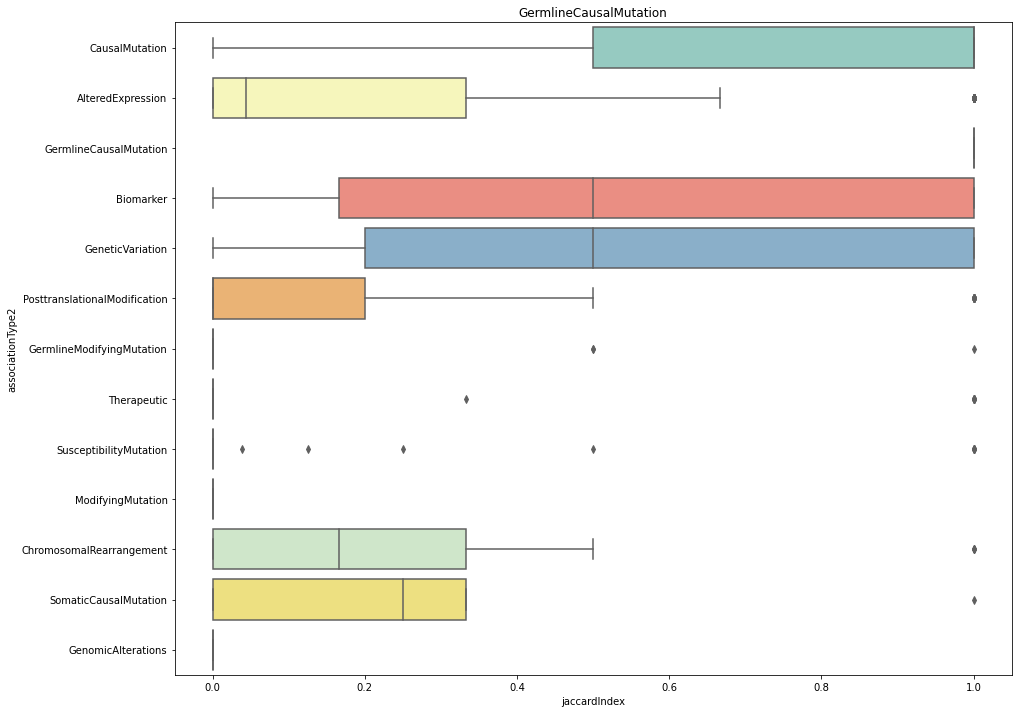

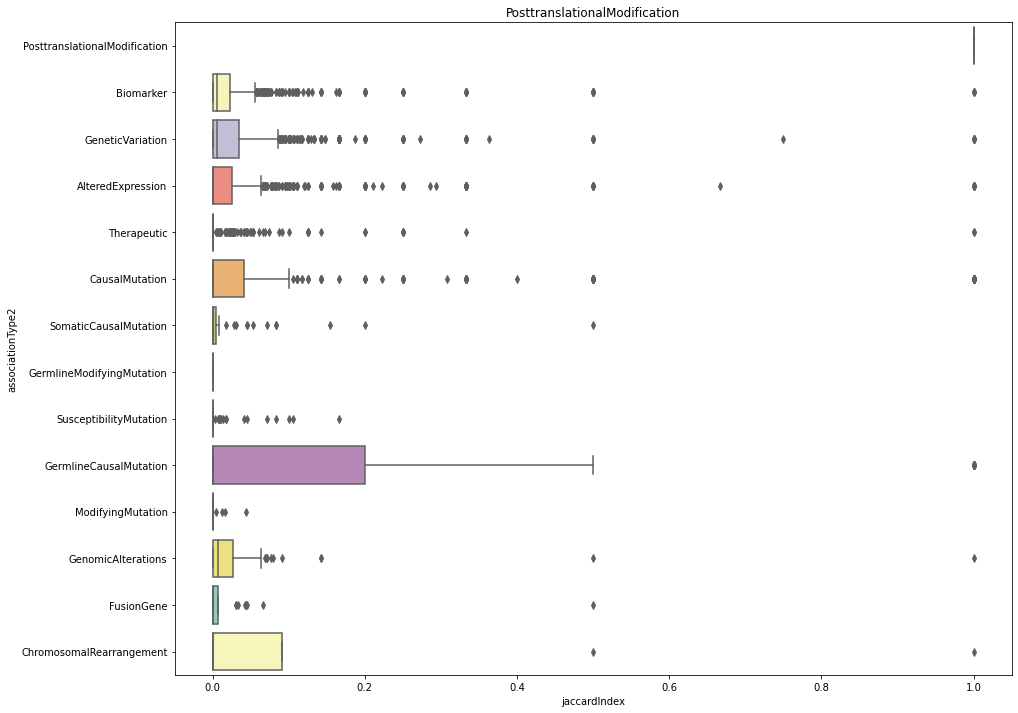

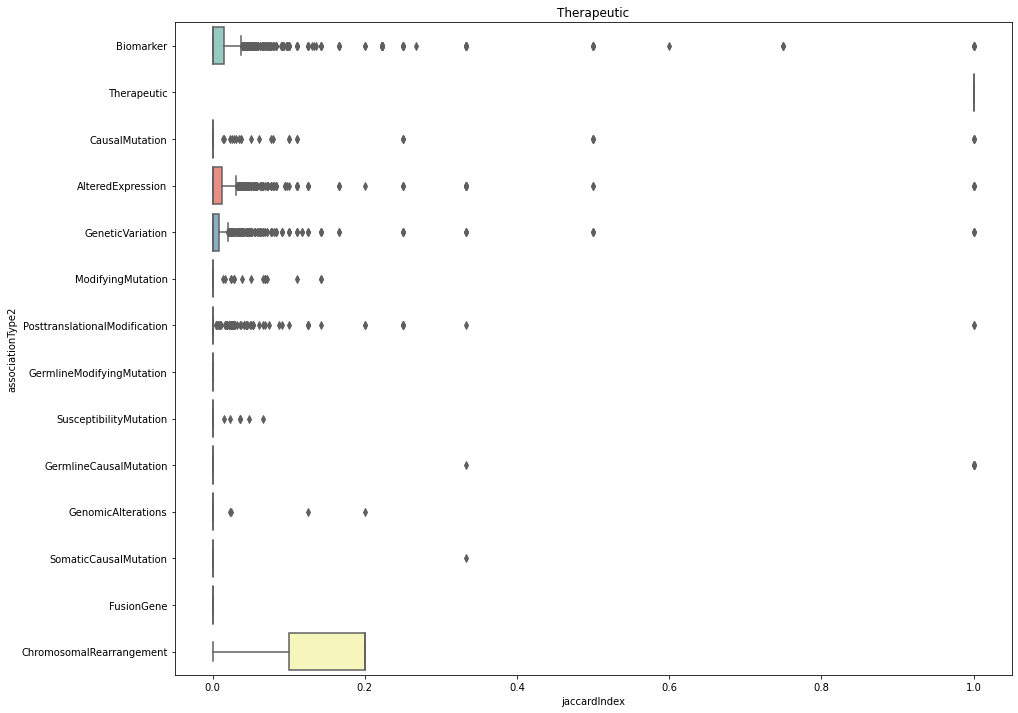

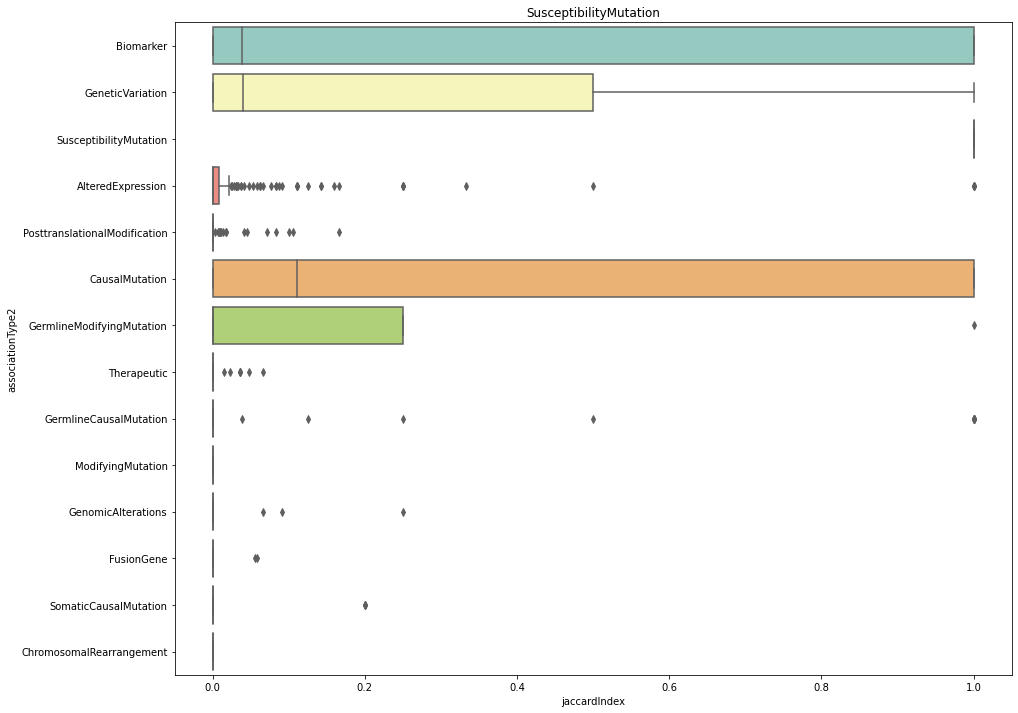

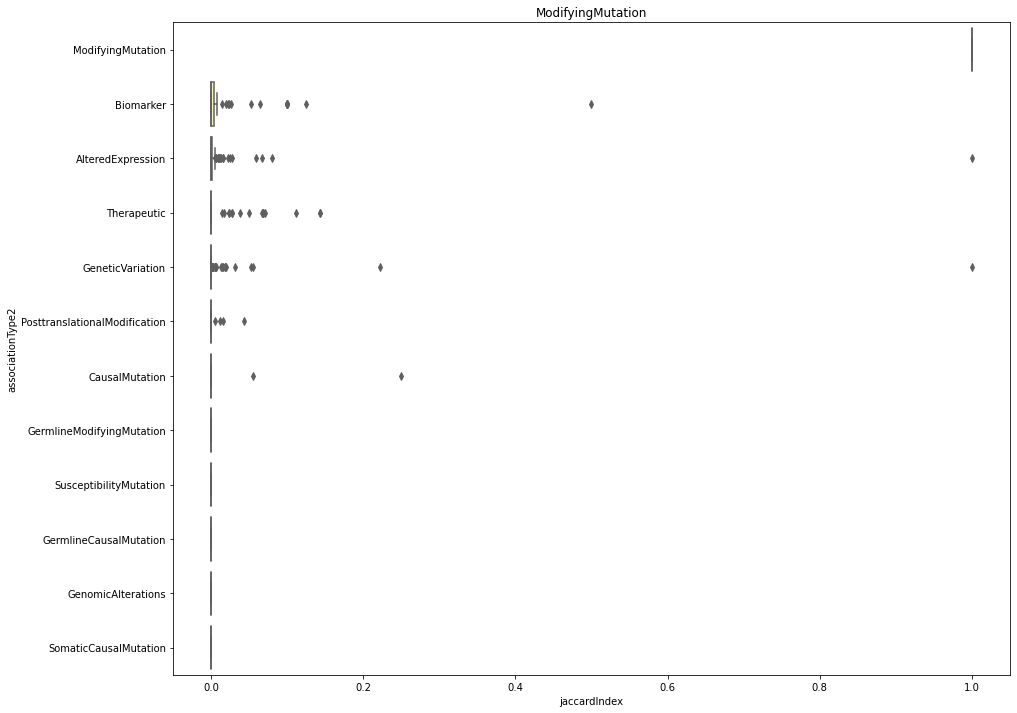

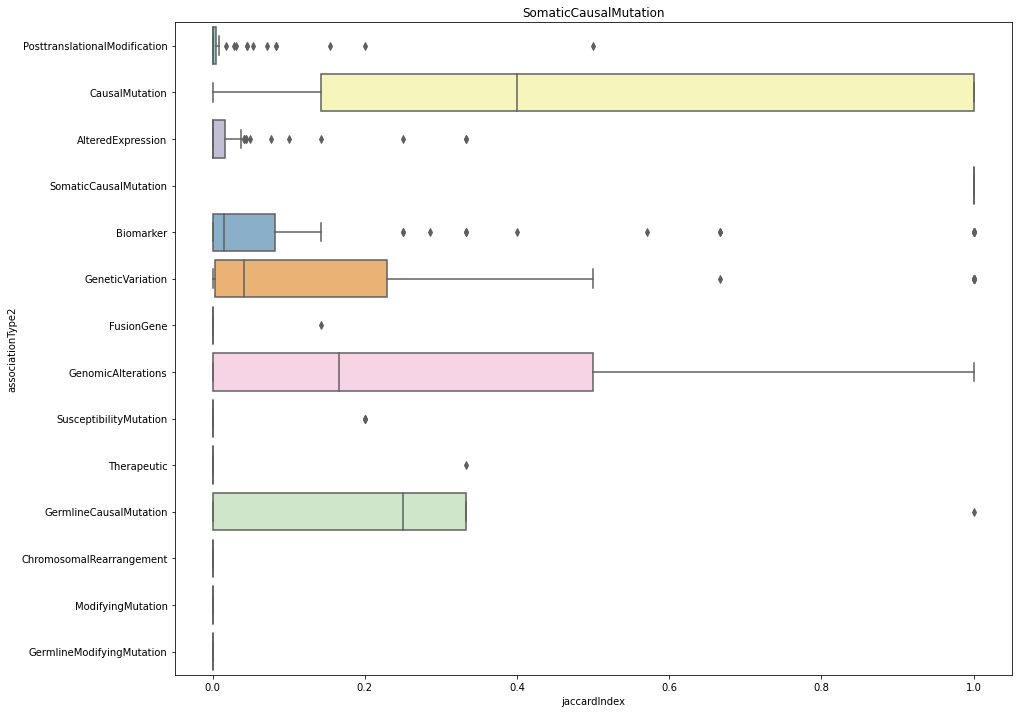

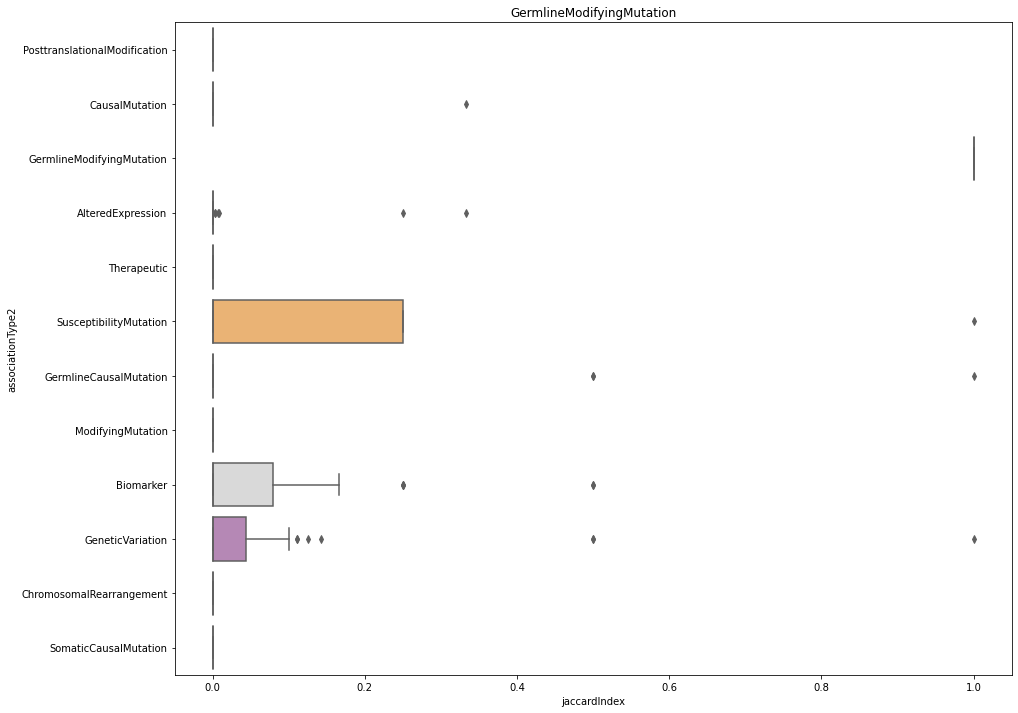

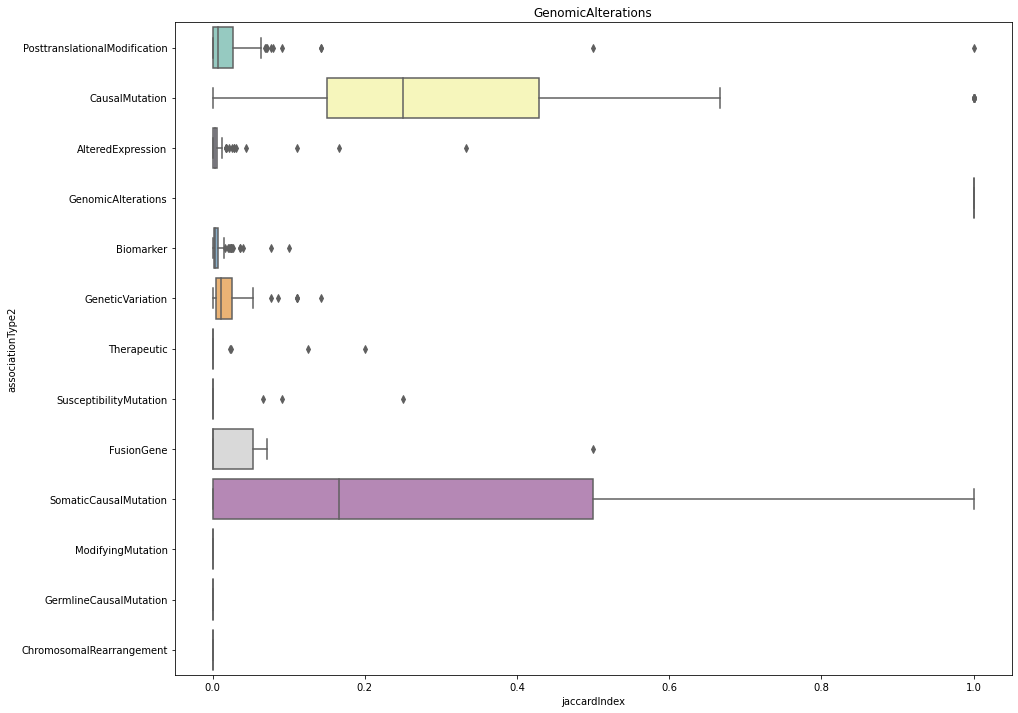

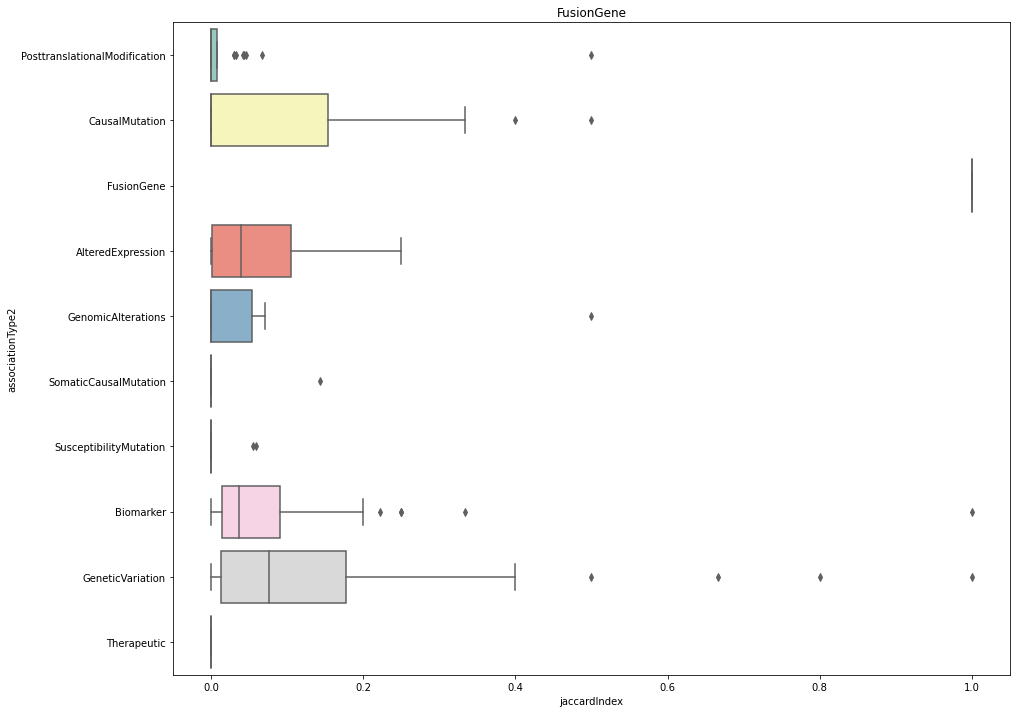

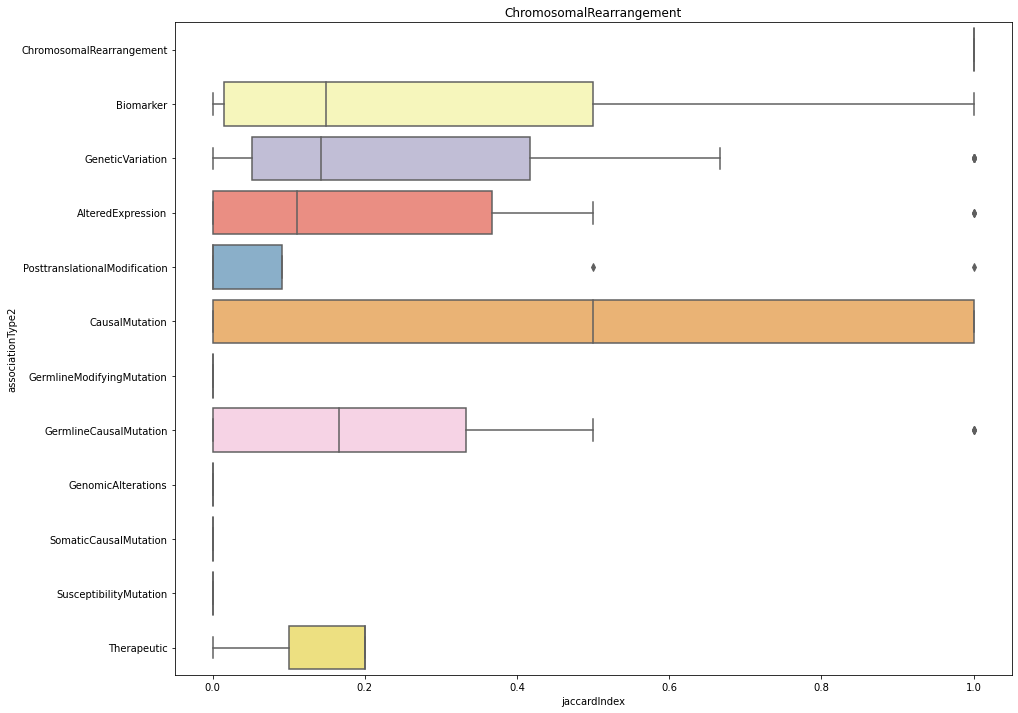

In [20]:
for i, associationType in enumerate(resultGE.associationType1.unique(), 1): #Iterating through each unique association Type
    data = resultGE[resultGE.associationType1 == associationType] #Filtering by association Type
    fig, ax = plt.subplots(figsize = (15,12))
    sns.boxplot(x = 'jaccardIndex', y = 'associationType2',
                 data = data, palette="Set3", orient = 'h')
    plt.title(associationType)

In [21]:
# Reorganizing the Dataset to Obtain the Median Values for Each Association Type Combination:
# This new dataset will have one row for each association type combination, a set of the jaccard Indices for that association type combination, and a median of the values for each of those sets. Those median values are what will be placed in the heatmap
resultGE2 = resultGE.drop(columns = ['diseaseNID', 'geneNID1', 'geneNID2'])
resultGE2 = resultGE2.groupby(by = ['associationType1', 'associationType2'])['jaccardIndex'].apply(lambda x: list(x))
resultGE2 = resultGE2.reset_index()

In [22]:
jaccardsets = resultGE2['jaccardIndex']
medians = []
for set in jaccardsets:
    medians.append(statistics.median(set))
resultGE2['Median'] = medians
resultGE2

,associationType1,associationType2,jaccardIndex,Median
0,AlteredExpression,AlteredExpression,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000
1,AlteredExpression,Biomarker,"[0.1111111111111111, 0.02456140350877193, 0.06...",0.039286
2,AlteredExpression,CausalMutation,"[0.0, 0.07692307692307693, 0.0, 0.111111111111...",0.000000
3,AlteredExpression,ChromosomalRearrangement,"[0.5, 0.2, 0.0, 0.0, 0.11538461538461539, 0.5,...",0.111111
4,AlteredExpression,FusionGene,"[0.018315018315018316, 0.009433962264150943, 0...",0.039855
...,...,...,...,...
179,Therapeutic,ModifyingMutation,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666...",0.000000
180,Therapeutic,PosttranslationalModification,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0687022900763...",0.000000
181,Therapeutic,SomaticCausalMutation,"[0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, ...",0.000000
182,Therapeutic,SusceptibilityMutation,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014...",0.000000


## The Heatmap:

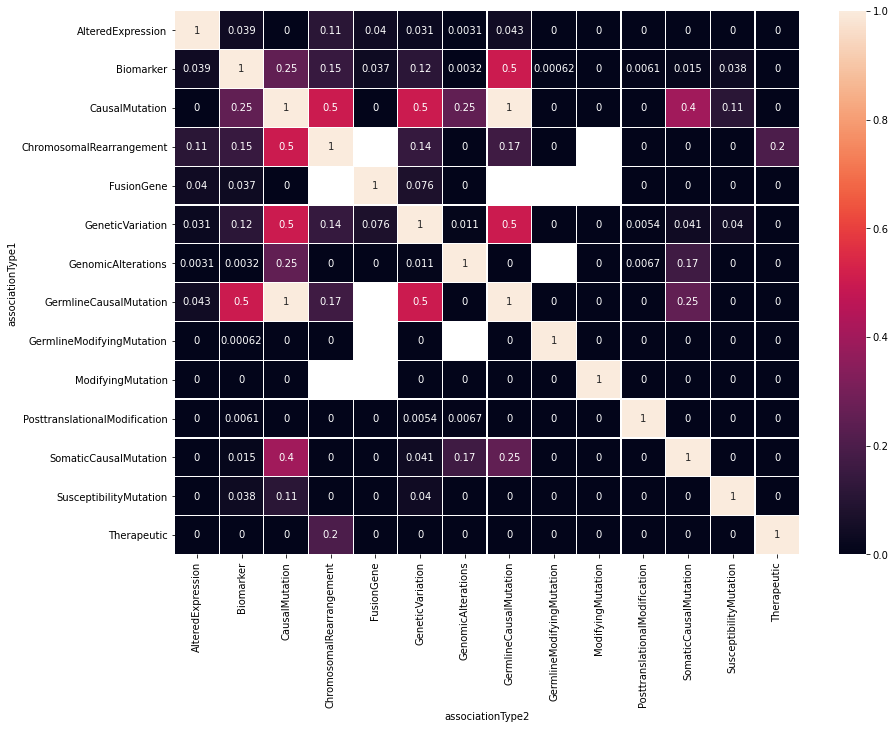

In [23]:
resultGE3 = resultGE2.pivot("associationType1", "associationType2", "Median")
fig, ax = plt.subplots(figsize=(14,10))   
ax = sns.heatmap(resultGE3, annot = True, linewidths = .25)

This heatmap provides a lot of useful information. The first thing one will probably notice the numerous blank spaces within the heatmap; this is due to the fact that not every association type could be mapped/compared to another association type. For example, a disease could have association types for Biomarker, Altered Expression, and Fusion Gene. This leads to six different permutations and six boxes filled in the heatmap above. However, for that disease, there are no permutations containing the other eleven association types. If there is not an association type combination made for any disease, there cannot be any data represented for that box in the heatmap. One can also see that the diagonal of the heatmap is completely empty, which makes sense because we purposely did not make association type permutations of the same association type (as the values would all be 1). 

Moving on, the heatmap helps to show a few clear highlights/high correlations between association types.  CausalMutation/GermlineCausalMutation has a heatmap/median value of 1, suggesting they correlate perfectly. It may make sense that Germline Causal Mutation correlates strongly with Causal Mutation since Causal Mutation is an ancestor (parent) of Germline Causal Mutation.

Other high correlations seen in the heatmap exist between CausalMutation/GeneticVariation, ChromosomalRearrangement/CausalMutation, GeneticVariation/GermlineCausalMutation, Biomarker/GermlineCausalMutation. 

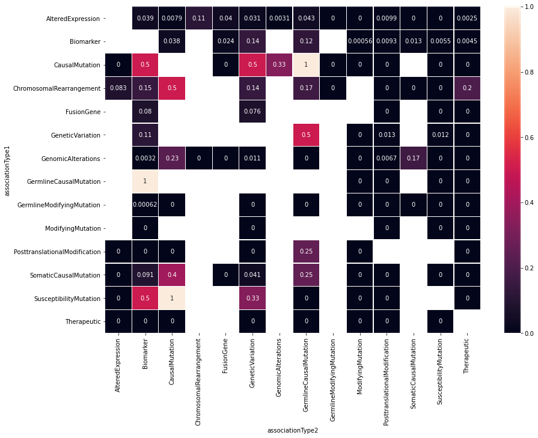

In [28]:
# To see the old heatmap (with combinations rather than permutations), run this cell***
display.Image("./combinationHeatmap.png")

## Propagated Dataset

In [24]:
# Dataset with Rows Combined with same Gene and Disease
dfcomb = threeCol.groupby(by = ['diseaseNID', 'geneNID'])['associationType'].apply(lambda x: set(x))
#Could also do dfcomb = pd.read_csv('tempprop.csv')

TypeError: 'list' object is not callable

In [25]:
dfcomb = pd.read_csv('tempprop.csv')
dfcomb

,diseaseNID,geneNID,associationType
0,1,1088,{'Biomarker'}
1,1,3070,{'Biomarker'}
2,2,10721,{'Biomarker'}
3,3,54,{'Biomarker'}
4,3,170,{'Biomarker'}
...,...,...,...
1135040,30292,11963,{'AlteredExpression'}
1135041,30292,18471,{'Biomarker'}
1135042,30292,19792,{'Biomarker'}
1135043,30293,6353,{'Biomarker'}


In [28]:
dfcomb['associationType'] = dfcomb['associationType'].apply(lambda x: set(x[2:-2].split("', '")))
dfcomb

TypeError: 'list' object is not callable

In [ ]:
dfcomb = dfcomb.reset_index()
dfcomb

In [27]:
isinstance(dfcomb.iloc[0]['associationType'], str)

True

In [29]:
templist = []
for index, row in dfcomb.iterrows():
    tempSet = set()
    for association in row['associationType']:
        tempSet.update(nx.algorithms.dag.ancestors(G, association))
        tempSet.add(association)
    templist.append(tempSet)

TypeError: 'list' object is not callable

In [ ]:
dfcomb['propagatedAssociationTypes'] = templist
dfcomb
#Can also access propagated dataset with prop = pd.read_csv('associationPropagationnew2.csv')

In [ ]:
diseaseinfo = pd.read_csv('diseaseAttributes.tsv', sep = "\t")
geneinfo = pd.read_csv('geneAttributes.tsv', sep = "\t")
geneinfo = geneinfo.drop(columns = ['pLI', 'DSI', 'DPI'])
result1 = dfcomb.merge(diseaseinfo)
combined = result1.merge(geneinfo)

In [ ]:
combined

## Writing the Data to GMT Files:

In [21]:
gmtfiledata = a.merge(diseaseinfo)
gmtfiledata

,diseaseNID,associationType,geneNID,diseaseId,diseaseName,type
0,1,Biomarker,"{1088, 3070}",C0000727,"Abdomen, Acute",phenotype
1,2,Biomarker,{10721},C0000729,Abdominal Cramps,phenotype
2,3,Biomarker,"{522, 525, 7694, 5650, 11283, 5139, 12826, 156...",C0000731,Abdomen distended,phenotype
3,3,CausalMutation,"{3065, 5458, 1813}",C0000731,Abdomen distended,phenotype
4,3,GeneticVariation,"{6417, 17182, 4711}",C0000731,Abdomen distended,phenotype
...,...,...,...,...,...,...
67784,30291,GeneticVariation,{5241},C4757951,Desmoplastic infantile astrocytoma and ganglio...,disease
67785,30292,AlteredExpression,"{3833, 11963, 2493, 270}",C4759295,Non-metastatic prostate cancer,disease
67786,30292,Biomarker,"{18471, 1738, 9805, 46, 270, 19792, 6738, 3829...",C4759295,Non-metastatic prostate cancer,disease
67787,30292,GeneticVariation,"{2403, 1738, 9805, 270, 6738, 3829, 4057}",C4759295,Non-metastatic prostate cancer,disease


In [23]:
dfOG = dfOG.merge(geneinfo)
geneID = dfOG.groupby(by = ['diseaseNID', 'associationType'])['geneId'].apply(lambda x: set(x))
geneID = geneID.reset_index()
gmtfiledata = gmtfiledata.merge(geneID)
gmtfiledata

,diseaseNID,associationType,geneNID,diseaseId,diseaseName,type,geneId
0,1,Biomarker,"{1088, 3070}",C0000727,"Abdomen, Acute",phenotype,"{4210, 1468}"
1,2,Biomarker,{10721},C0000729,Abdominal Cramps,phenotype,{54808}
2,3,Biomarker,"{522, 525, 7694, 5650, 11283, 5139, 12826, 156...",C0000731,Abdomen distended,phenotype,"{2050, 7173, 3592, 3594, 4629, 5660, 4638, 668..."
3,3,CausalMutation,"{3065, 5458, 1813}",C0000731,Abdomen distended,phenotype,"{2538, 4204, 7454}"
4,3,GeneticVariation,"{6417, 17182, 4711}",C0000731,Abdomen distended,phenotype,"{6514, 9091, 285175}"
...,...,...,...,...,...,...,...
67784,30291,GeneticVariation,{5241},C4757951,Desmoplastic infantile astrocytoma and ganglio...,disease,{7157}
67785,30292,AlteredExpression,"{3833, 11963, 2493, 270}",C4759295,Non-metastatic prostate cancer,disease,"{5328, 354, 57580, 3429}"
67786,30292,Biomarker,"{18471, 1738, 9805, 46, 270, 19792, 6738, 3829...",C4759295,Non-metastatic prostate cancer,disease,"{354, 1956, 100126309, 4968, 2346, 5324, 2925,..."
67787,30292,GeneticVariation,"{2403, 1738, 9805, 270, 6738, 3829, 4057}",C4759295,Non-metastatic prostate cancer,disease,"{354, 2346, 5324, 29968, 9520, 3283, 5627}"


In [24]:
gmtdatafinal = gmtfiledata[['associationType','diseaseId', 'diseaseName', 'geneId']]
gmtdatafinal
#Can also use names = pd.read_csv('stupid.csv')

,associationType,diseaseId,diseaseName,geneId
0,Biomarker,C0000727,"Abdomen, Acute","{4210, 1468}"
1,Biomarker,C0000729,Abdominal Cramps,{54808}
2,Biomarker,C0000731,Abdomen distended,"{2050, 7173, 3592, 3594, 4629, 5660, 4638, 668..."
3,CausalMutation,C0000731,Abdomen distended,"{2538, 4204, 7454}"
4,GeneticVariation,C0000731,Abdomen distended,"{6514, 9091, 285175}"
...,...,...,...,...
67784,GeneticVariation,C4757951,Desmoplastic infantile astrocytoma and ganglio...,{7157}
67785,AlteredExpression,C4759295,Non-metastatic prostate cancer,"{5328, 354, 57580, 3429}"
67786,Biomarker,C4759295,Non-metastatic prostate cancer,"{354, 1956, 100126309, 4968, 2346, 5324, 2925,..."
67787,GeneticVariation,C4759295,Non-metastatic prostate cancer,"{354, 2346, 5324, 29968, 9520, 3283, 5627}"


In [25]:
dict_of_associations = dict(iter(gmtdatafinal.groupby('associationType')))


In [26]:
def write_gmt(filename, names, labels):
    with open(filename, "w") as f:
        for term in labels:
            f.write(
                "{}\t{}\t{}\n".format(
                    term, names[term], "\t".join(labels[term])
                )
            )

In [37]:
# DO NOT RUN THIS CELL!!!****
for associationType in dict_of_associations:
    write_gmt(filename = ("" + associationType + ".gmt"), names = (dict_of_associations[associationType].set_index('diseaseId').to_dict()['diseaseName']), 
              labels = (dict_of_associations[associationType].set_index('diseaseId').to_dict()['geneId']))
    

## Determining the Number of Unique Genes for Each Association Type:

In [15]:
unique = threeCol.groupby(by = ['geneNID'])['associationType'].apply(lambda x: set(x))

In [16]:
unique = unique.reset_index()
unique = unique[unique['associationType'].map(lambda d: len(d)) < 2]
unique['associationType'].value_counts()

TypeError: unhashable type: 'set'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'set'


{GeneticVariation}                 2987
{Biomarker}                        1532
{AlteredExpression}                 382
{CausalMutation}                     36
{PosttranslationalModification}      15
{GermlineCausalMutation}              7
{FusionGene}                          1
Name: associationType, dtype: int64

We were planning on removing Biomarker, Fusion Gene, Causal Mutation, Germline Causal Mutation, Posttranslational Modification, so this means we would be "losing" a total of approx 1600 unique genes

## Digraph/Tree for the Association Type Hierarchy:

In [9]:
G = nx.DiGraph()

In [10]:
G.add_node('Therapeutic')
G.add_node('Biomarker')
G.add_node('GenomicAlterations')
G.add_node('AlteredExpression')
G.add_node('PosttranslationalModification')
G.add_node('ChromosomalRearrangement')
G.add_node('GeneticVariation')
G.add_node('FusionGene')
G.add_node('SusceptibilityMutation')
G.add_node('CausalMutation')
G.add_node('ModifyingMutation')
G.add_node('SomaticCausalMutation')
G.add_node('GermlineCausalMutation')
G.add_node('GermlineModifyingMutation')
G.add_node('SomaticModifyingMutation')

In [11]:
G.add_edges_from([('Biomarker', 'GenomicAlterations'), ('Biomarker', 'AlteredExpression'), ('Biomarker', 'PosttranslationalModification'), 
               ('GenomicAlterations','ChromosomalRearrangement'), ('GenomicAlterations','GeneticVariation'), ('GenomicAlterations','FusionGene'), 
               ('GeneticVariation', 'SusceptibilityMutation'), ('GeneticVariation', 'CausalMutation'), ('GeneticVariation', 'ModifyingMutation'), 
               ('CausalMutation', 'SomaticCausalMutation'), ('CausalMutation', 'GermlineCausalMutation'), 
               ('ModifyingMutation', 'SomaticModifyingMutation'), ('ModifyingMutation', 'GermlineModifyingMutation')])

In [12]:
# Getting the Ancestors for a Certain Association Type (Example):
nx.algorithms.dag.ancestors(G, 'SomaticModifyingMutation')

{'Biomarker', 'GeneticVariation', 'GenomicAlterations', 'ModifyingMutation'}

## Next Steps:

- Work with curated dataset
- Recategorize dataset
    - Make sure that the subcategories are correctly categorized within the larger categories
    - Once the dataset is recategorized, redo the work you did on the original dataset to get the boxplots and heatmap for the new dataset
- Machine Learning Code Anna Sent    


- Update anna on propagated data
- Should I recategorize the dataset on the propagated data or the original data?
- Should I recategorize the dataset by totally removing the rows that do not have the desired association type or should I just relabel them based on our hierarchy?
- Why did the median correlation coefficients change in the boxplot—THE MEDIAN CHANGED BECAUSE THAT IS NO LONGER THE MEDIAN VALUE (REMEMBER THAT THE DATASET WAS DOUBLED IN SIZE)
- Should I write the recategorized dataset or curated dataset to gmt files as well?


- Write descriptions/interpretations for the new plots made
- 6 Website Links
- Program Tutorial Links in Wiki
- Read papers Arjun sent earlier
- Complete Graphery tutorial


- Since we expect these overlaps to be low, we will devise supervised machine learning approaches, including logistic regression, to determine if, for a given disease, genes from an association type can be used to accurately predict genes from another type based on their patterns of interaction in a gene network. 
- Finally, we will explore how to combine the machine learning models built for each association type into an ensemble model that discovers novel genes across the human genome associated with that disease.
- Such results can lead to a general understanding of the genomic basis of complex diseases and in the design of drugs that target and reverse the disease-related signals.




In [30]:
curated = pd.read_csv('curated_gene_disease_associations.tsv', sep = "\t")
curated

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.700,0.538,C0019209,Hepatomegaly,phenotype,C23;C06,Finding,0.30,1.000,2017.0,2017.0,1,0,CTD_human
1,1,A1BG,0.700,0.538,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.30,1.000,2015.0,2015.0,1,0,CTD_human
2,2,A2M,0.529,0.769,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,0.50,0.769,1998.0,2018.0,3,0,CTD_human
3,2,A2M,0.529,0.769,C0007102,Malignant tumor of colon,disease,C06;C04,Neoplastic Process,0.31,1.000,2004.0,2019.0,1,0,CTD_human
4,2,A2M,0.529,0.769,C0009375,Colonic Neoplasms,group,C06;C04,Neoplastic Process,0.30,1.000,2004.0,2004.0,1,0,CTD_human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84033,109580095,HBB-LCR,0.743,0.115,C0002875,Cooley's anemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84034,109580095,HBB-LCR,0.743,0.115,C0005283,beta Thalassemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84035,109580095,HBB-LCR,0.743,0.115,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84036,109580095,HBB-LCR,0.743,0.115,C0085578,Thalassemia Minor,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human


## Recategorized Dataset:

In [5]:
prop = pd.read_csv('associationPropagationnew2.csv')
prop = prop.drop(columns = ['diseaseId', 'diseaseName', 'type', 'geneId', 'geneName', 'geneDescription'])

In [6]:
prop['associationType'] = prop['associationType'].apply(lambda x: set(x[2:-2].split("', '")))

In [7]:
prop['propagatedAssociationTypes'] = prop['propagatedAssociationTypes'].apply(lambda x: set(x[2:-2].split("', '")))

In [19]:
##TEST:
dfcombbm = dfcomb[dfcomb['associationType'].map(lambda d: d) == {'Biomarker'}]
dfcombbm

,diseaseNID,geneNID,associationType
0,1,1088,{Biomarker}
1,1,3070,{Biomarker}
2,2,10721,{Biomarker}
3,3,54,{Biomarker}
4,3,170,{Biomarker}
...,...,...,...
1135034,30292,3551,{Biomarker}
1135041,30292,18471,{Biomarker}
1135042,30292,19792,{Biomarker}
1135043,30293,6353,{Biomarker}


In [8]:
bm = prop[prop['associationType'].map(lambda d: d) == {'Biomarker'}]
bm

,diseaseNID,geneNID,associationType,propagatedAssociationTypes
0,1,1088,{Biomarker},{Biomarker}
1,448,1088,{Biomarker},{Biomarker}
2,589,1088,{Biomarker},{Biomarker}
3,827,1088,{Biomarker},{Biomarker}
4,1102,1088,{Biomarker},{Biomarker}
...,...,...,...,...
1135029,29239,20075,{Biomarker},{Biomarker}
1135030,29280,20163,{Biomarker},{Biomarker}
1135032,29341,20169,{Biomarker},{Biomarker}
1135035,29763,9527,{Biomarker},{Biomarker}


In [9]:
nonbm = prop[prop['associationType'].map(lambda d: d) != {'Biomarker'}]
nonbm

,diseaseNID,geneNID,associationType,propagatedAssociationTypes
6,1317,1088,{AlteredExpression},"{AlteredExpression, Biomarker}"
7,1338,1088,{AlteredExpression},"{AlteredExpression, Biomarker}"
9,1741,1088,{AlteredExpression},"{AlteredExpression, Biomarker}"
14,2107,1088,{PosttranslationalModification},"{PosttranslationalModification, Biomarker}"
16,2592,1088,{AlteredExpression},"{AlteredExpression, Biomarker}"
...,...,...,...,...
1135039,29802,18834,{AlteredExpression},"{AlteredExpression, Biomarker}"
1135040,29802,18837,{AlteredExpression},"{AlteredExpression, Biomarker}"
1135042,30104,25482,{CausalMutation},"{CausalMutation, GeneticVariation, GenomicAlte..."
1135043,30147,21709,{CausalMutation},"{CausalMutation, GeneticVariation, GenomicAlte..."


In [10]:
result = pd.DataFrame([(c, tup.diseaseNID, tup.geneNID, tup.associationType) for tup in nonbm.itertuples() for c in tup.propagatedAssociationTypes])
result

,0,1,2,3
0,AlteredExpression,1317,1088,{AlteredExpression}
1,Biomarker,1317,1088,{AlteredExpression}
2,AlteredExpression,1338,1088,{AlteredExpression}
3,Biomarker,1338,1088,{AlteredExpression}
4,AlteredExpression,1741,1088,{AlteredExpression}
...,...,...,...,...
1553762,Biomarker,30147,21709,{CausalMutation}
1553763,CausalMutation,30157,10975,{CausalMutation}
1553764,GeneticVariation,30157,10975,{CausalMutation}
1553765,GenomicAlterations,30157,10975,{CausalMutation}


In [11]:
result = result.rename(columns= {0: 'propagatedAssociationType', 1: 'diseaseNID', 2: 'geneNID', 3: 'ogAssociationTypes'})
result

,propagatedAssociationType,diseaseNID,geneNID,ogAssociationTypes
0,AlteredExpression,1317,1088,{AlteredExpression}
1,Biomarker,1317,1088,{AlteredExpression}
2,AlteredExpression,1338,1088,{AlteredExpression}
3,Biomarker,1338,1088,{AlteredExpression}
4,AlteredExpression,1741,1088,{AlteredExpression}
...,...,...,...,...
1553762,Biomarker,30147,21709,{CausalMutation}
1553763,CausalMutation,30157,10975,{CausalMutation}
1553764,GeneticVariation,30157,10975,{CausalMutation}
1553765,GenomicAlterations,30157,10975,{CausalMutation}


In [12]:
result2 = result[result['propagatedAssociationType'].map(lambda d: d == 'AlteredExpression' or d =='GenomicAlterations' or d == 'Therapeutic' or d == 'PosttranslationalModification') ]

In [13]:
result2

,propagatedAssociationType,diseaseNID,geneNID,ogAssociationTypes
0,AlteredExpression,1317,1088,{AlteredExpression}
2,AlteredExpression,1338,1088,{AlteredExpression}
4,AlteredExpression,1741,1088,{AlteredExpression}
6,PosttranslationalModification,2107,1088,{PosttranslationalModification}
8,AlteredExpression,2592,1088,{AlteredExpression}
...,...,...,...,...
1553751,AlteredExpression,29802,18834,{AlteredExpression}
1553753,AlteredExpression,29802,18837,{AlteredExpression}
1553757,GenomicAlterations,30104,25482,{CausalMutation}
1553761,GenomicAlterations,30147,21709,{CausalMutation}


In [19]:
result2['propagatedAssociationType'].unique()

array(['AlteredExpression', 'PosttranslationalModification',
       'GenomicAlterations', 'Therapeutic'], dtype=object)

In [30]:
bm['propagatedAssociationTypes'] = bm['propagatedAssociationTypes'].apply(lambda x: ("".join(x)))
bm


<ipython-input-30-350393a3f60d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bm['propagatedAssociationTypes'] = bm['propagatedAssociationTypes'].apply(lambda x: ("".join(x)))


,diseaseNID,geneNID,associationType,propagatedAssociationTypes
0,1,1088,{Biomarker},Biomarker
1,448,1088,{Biomarker},Biomarker
2,589,1088,{Biomarker},Biomarker
3,827,1088,{Biomarker},Biomarker
4,1102,1088,{Biomarker},Biomarker
...,...,...,...,...
1135029,29239,20075,{Biomarker},Biomarker
1135030,29280,20163,{Biomarker},Biomarker
1135032,29341,20169,{Biomarker},Biomarker
1135035,29763,9527,{Biomarker},Biomarker


In [32]:
bm = bm.rename(columns={'associationType': 'ogAssociationTypes', 'propagatedAssociationTypes': 'propagatedAssociationType'})

In [33]:
result3 = result2.append(bm)
result3

,propagatedAssociationType,diseaseNID,geneNID,ogAssociationTypes
0,AlteredExpression,1317,1088,{AlteredExpression}
2,AlteredExpression,1338,1088,{AlteredExpression}
4,AlteredExpression,1741,1088,{AlteredExpression}
6,PosttranslationalModification,2107,1088,{PosttranslationalModification}
8,AlteredExpression,2592,1088,{AlteredExpression}
...,...,...,...,...
1135029,Biomarker,29239,20075,{Biomarker}
1135030,Biomarker,29280,20163,{Biomarker}
1135032,Biomarker,29341,20169,{Biomarker}
1135035,Biomarker,29763,9527,{Biomarker}


In [34]:
result3 = result3[["diseaseNID", "geneNID", "propagatedAssociationType", "ogAssociationTypes"]]
result3

,diseaseNID,geneNID,propagatedAssociationType,ogAssociationTypes
0,1317,1088,AlteredExpression,{AlteredExpression}
2,1338,1088,AlteredExpression,{AlteredExpression}
4,1741,1088,AlteredExpression,{AlteredExpression}
6,2107,1088,PosttranslationalModification,{PosttranslationalModification}
8,2592,1088,AlteredExpression,{AlteredExpression}
...,...,...,...,...
1135029,29239,20075,Biomarker,{Biomarker}
1135030,29280,20163,Biomarker,{Biomarker}
1135032,29341,20169,Biomarker,{Biomarker}
1135035,29763,9527,Biomarker,{Biomarker}


In [35]:
result3.to_csv('relabeledDataset.csv', index = False)

### Separate Project (Getting all Biomarker Columns):

In [20]:
bmtest = threeCol.groupby(by = ['diseaseNID', 'geneNID'])['associationType'].apply(lambda x: set(x))
bmtest = bmtest.reset_index()
bmtest

,diseaseNID,geneNID,associationType
0,1,1088,{Biomarker}
1,1,3070,{Biomarker}
2,2,10721,{Biomarker}
3,3,54,{Biomarker}
4,3,170,{Biomarker}
...,...,...,...
1135040,30292,11963,{AlteredExpression}
1135041,30292,18471,{Biomarker}
1135042,30292,19792,{Biomarker}
1135043,30293,6353,{Biomarker}


In [14]:
bm = threeCol[threeCol['associationType'].map(lambda d: d) == 'Biomarker']
bm

,diseaseNID,geneNID,associationType
0,1,1088,Biomarker
1,1,3070,Biomarker
2,2,10721,Biomarker
3,3,2680,Biomarker
4,3,10946,Biomarker
...,...,...,...
3261318,30292,270,Biomarker
3261320,30292,1738,Biomarker
3261321,30292,1738,Biomarker
3261322,30293,6353,Biomarker


In [5]:
bm['propagatedAssociationType'] = bm['associationType']
bm

<ipython-input-5-14db46e2f0dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bm['propagatedAssociationType'] = bm['associationType']


,diseaseNID,geneNID,associationType,propagatedAssociationType
0,1,1088,Biomarker,Biomarker
1,1,3070,Biomarker,Biomarker
2,2,10721,Biomarker,Biomarker
3,3,2680,Biomarker,Biomarker
4,3,10946,Biomarker,Biomarker
...,...,...,...,...
3261318,30292,270,Biomarker,Biomarker
3261320,30292,1738,Biomarker,Biomarker
3261321,30292,1738,Biomarker,Biomarker
3261322,30293,6353,Biomarker,Biomarker


In [6]:
bm2 = bm.groupby(by = ['diseaseNID', 'geneNID'])['associationType'].apply(lambda x: set(x))
bm2 = bm2.reset_index()
bm2

,diseaseNID,geneNID,associationType
0,1,1088,{Biomarker}
1,1,3070,{Biomarker}
2,2,10721,{Biomarker}
3,3,54,{Biomarker}
4,3,170,{Biomarker}
...,...,...,...
766860,30292,9805,{Biomarker}
766861,30292,18471,{Biomarker}
766862,30292,19792,{Biomarker}
766863,30293,6353,{Biomarker}


In [7]:
bm2['propagatedAssociationType'] = bm2['associationType']
bm2

,diseaseNID,geneNID,associationType,propagatedAssociationType
0,1,1088,{Biomarker},{Biomarker}
1,1,3070,{Biomarker},{Biomarker}
2,2,10721,{Biomarker},{Biomarker}
3,3,54,{Biomarker},{Biomarker}
4,3,170,{Biomarker},{Biomarker}
...,...,...,...,...
766860,30292,9805,{Biomarker},{Biomarker}
766861,30292,18471,{Biomarker},{Biomarker}
766862,30292,19792,{Biomarker},{Biomarker}
766863,30293,6353,{Biomarker},{Biomarker}


In [8]:
bm2['propagatedAssociationType'] = bm2['propagatedAssociationType'].apply(lambda x: ("".join(x)))
bm2

,diseaseNID,geneNID,associationType,propagatedAssociationType
0,1,1088,{Biomarker},Biomarker
1,1,3070,{Biomarker},Biomarker
2,2,10721,{Biomarker},Biomarker
3,3,54,{Biomarker},Biomarker
4,3,170,{Biomarker},Biomarker
...,...,...,...,...
766860,30292,9805,{Biomarker},Biomarker
766861,30292,18471,{Biomarker},Biomarker
766862,30292,19792,{Biomarker},Biomarker
766863,30293,6353,{Biomarker},Biomarker


In [9]:
bm2 = bm2.rename(columns={'associationType': 'ogAssociationTypes'})

In [20]:
bm2

,diseaseNID,geneNID,ogAssociationTypes,propagatedAssociationType
0,1,1088,{Biomarker},Biomarker
1,1,3070,{Biomarker},Biomarker
2,2,10721,{Biomarker},Biomarker
3,3,54,{Biomarker},Biomarker
4,3,170,{Biomarker},Biomarker
...,...,...,...,...
766860,30292,9805,{Biomarker},Biomarker
766861,30292,18471,{Biomarker},Biomarker
766862,30292,19792,{Biomarker},Biomarker
766863,30293,6353,{Biomarker},Biomarker


In [21]:
result3 = result2.append(bm2)
result3

,propagatedAssociationType,diseaseNID,geneNID,ogAssociationTypes
1,AlteredExpression,1317,1088,{AlteredExpression}
3,AlteredExpression,1338,1088,{AlteredExpression}
5,AlteredExpression,1741,1088,{AlteredExpression}
7,PosttranslationalModification,2107,1088,{PosttranslationalModification}
9,AlteredExpression,2592,1088,{AlteredExpression}
...,...,...,...,...
766860,Biomarker,30292,9805,{Biomarker}
766861,Biomarker,30292,18471,{Biomarker}
766862,Biomarker,30292,19792,{Biomarker}
766863,Biomarker,30293,6353,{Biomarker}


In [22]:
result3 = result3[["diseaseNID", "geneNID", "propagatedAssociationType", "ogAssociationTypes"]]
result3

,diseaseNID,geneNID,propagatedAssociationType,ogAssociationTypes
1,1317,1088,AlteredExpression,{AlteredExpression}
3,1338,1088,AlteredExpression,{AlteredExpression}
5,1741,1088,AlteredExpression,{AlteredExpression}
7,2107,1088,PosttranslationalModification,{PosttranslationalModification}
9,2592,1088,AlteredExpression,{AlteredExpression}
...,...,...,...,...
766860,30292,9805,Biomarker,{Biomarker}
766861,30292,18471,Biomarker,{Biomarker}
766862,30292,19792,Biomarker,{Biomarker}
766863,30293,6353,Biomarker,{Biomarker}


In [ ]:
result3.to_csv('relabeledDataset.csv', index = False)

In [23]:
threeCol = result3.drop(columns = 'ogAssociationTypes')
threeCol

,diseaseNID,geneNID,propagatedAssociationType
1,1317,1088,AlteredExpression
3,1338,1088,AlteredExpression
5,1741,1088,AlteredExpression
7,2107,1088,PosttranslationalModification
9,2592,1088,AlteredExpression
...,...,...,...
766860,30292,9805,Biomarker
766861,30292,18471,Biomarker
766862,30292,19792,Biomarker
766863,30293,6353,Biomarker


In [24]:
# Creating Gene Sets for Each Association Type Based on Disease:
a = threeCol.groupby(by = ['diseaseNID', 'propagatedAssociationType'])['geneNID'].apply(lambda x: set(x))
a = a.reset_index()
a

,diseaseNID,propagatedAssociationType,geneNID
0,1,Biomarker,"{1088, 3070}"
1,2,Biomarker,{10721}
2,3,Biomarker,"{522, 525, 7694, 5650, 5139, 11283, 12826, 156..."
3,3,GenomicAlterations,"{4711, 6417, 5458, 1813, 3065, 17182}"
4,4,Biomarker,"{8402, 2627}"
...,...,...,...
58010,30291,GenomicAlterations,{5241}
58011,30292,AlteredExpression,"{3833, 11963, 2493, 270}"
58012,30292,Biomarker,"{18471, 1738, 3551, 9805, 46, 270, 19792, 6738..."
58013,30292,GenomicAlterations,"{2403, 1738, 9805, 270, 6738, 3829, 4057}"


In [25]:
# Creating Sets of association Types Based on Disease
a2 = a.groupby(by = ['diseaseNID'])['propagatedAssociationType'].apply(lambda x: set(x))
a2 = a2.to_frame().reset_index()
a2

,diseaseNID,propagatedAssociationType
0,1,{Biomarker}
1,2,{Biomarker}
2,3,"{GenomicAlterations, Biomarker}"
3,4,{Biomarker}
4,5,"{GenomicAlterations, Biomarker, AlteredExpress..."
...,...,...
30165,30289,{GenomicAlterations}
30166,30290,{GenomicAlterations}
30167,30291,{GenomicAlterations}
30168,30292,"{GenomicAlterations, Biomarker, AlteredExpress..."


In [26]:
# Creating the Different Possible Combinations of Association Types for Each Disease:
from itertools import product
a2['permutations'] = a2['propagatedAssociationType'].apply(lambda r: list(product(r,repeat = 2)))

In [27]:
# Removing the Diseases that Only Hold One Association Type:
a3 = a2[a2['permutations'].map(lambda d: len(d)) > 0]
a3

,diseaseNID,propagatedAssociationType,permutations
0,1,{Biomarker},"[(Biomarker, Biomarker)]"
1,2,{Biomarker},"[(Biomarker, Biomarker)]"
2,3,"{GenomicAlterations, Biomarker}","[(GenomicAlterations, GenomicAlterations), (Ge..."
3,4,{Biomarker},"[(Biomarker, Biomarker)]"
4,5,"{GenomicAlterations, Biomarker, AlteredExpress...","[(GenomicAlterations, GenomicAlterations), (Ge..."
...,...,...,...
30165,30289,{GenomicAlterations},"[(GenomicAlterations, GenomicAlterations)]"
30166,30290,{GenomicAlterations},"[(GenomicAlterations, GenomicAlterations)]"
30167,30291,{GenomicAlterations},"[(GenomicAlterations, GenomicAlterations)]"
30168,30292,"{GenomicAlterations, Biomarker, AlteredExpress...","[(GenomicAlterations, GenomicAlterations), (Ge..."


In [28]:
# Making a Separate Row for Each Combination:
resultGE = pd.DataFrame([(c, tup.diseaseNID) for tup in a3.itertuples() for c in tup.permutations])
resultGE = resultGE.rename(columns={0: 'Combos', 1: 'diseaseNID'})

In [29]:
# Separating the Created Combinations into 2 Columns:
resultGE[['associationType1','associationType2']] = pd.DataFrame(resultGE.Combos.tolist(), index= resultGE.index)

In [30]:
arowList = []
arow2List = []
for index, row in resultGE.iterrows():
    midrow = a.loc[(a['diseaseNID'] == row['diseaseNID']) & (a['propagatedAssociationType'] == row['associationType1'])]
    arowList.append(midrow.iloc[0]['geneNID'])
    
    midrow2 = a.loc[(a['diseaseNID'] == row['diseaseNID']) & (a['propagatedAssociationType'] == row['associationType2'])]
    arow2List.append(midrow2.iloc[0]['geneNID'])

In [31]:
resultGE['geneNID1'] = arowList
resultGE['geneNID2'] = arow2List
resultGE = resultGE.drop(columns = ['Combos'])
resultGE['jaccardIndex'] = np.nan

In [32]:
# Jaccard Similarity Coefficient/Jaccard Index Function:
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [33]:
def f(x):
    return jaccard(x['geneNID1'], x['geneNID2']) 

In [34]:
resultGE['jaccardIndex'] = resultGE.apply(f, axis = 1)
resultGE

,diseaseNID,associationType1,associationType2,geneNID1,geneNID2,jaccardIndex
0,1,Biomarker,Biomarker,"{1088, 3070}","{1088, 3070}",1.000000
1,2,Biomarker,Biomarker,{10721},{10721},1.000000
2,3,GenomicAlterations,GenomicAlterations,"{4711, 6417, 5458, 1813, 3065, 17182}","{4711, 6417, 5458, 1813, 3065, 17182}",1.000000
3,3,GenomicAlterations,Biomarker,"{4711, 6417, 5458, 1813, 3065, 17182}","{522, 525, 7694, 5650, 5139, 11283, 12826, 156...",0.009709
4,3,Biomarker,GenomicAlterations,"{522, 525, 7694, 5650, 5139, 11283, 12826, 156...","{4711, 6417, 5458, 1813, 3065, 17182}",0.009709
...,...,...,...,...,...,...
139796,30292,Biomarker,AlteredExpression,"{18471, 1738, 3551, 9805, 46, 270, 19792, 6738...","{3833, 11963, 2493, 270}",0.058824
139797,30292,AlteredExpression,GenomicAlterations,"{3833, 11963, 2493, 270}","{2403, 1738, 9805, 270, 6738, 3829, 4057}",0.100000
139798,30292,AlteredExpression,Biomarker,"{3833, 11963, 2493, 270}","{18471, 1738, 3551, 9805, 46, 270, 19792, 6738...",0.058824
139799,30292,AlteredExpression,AlteredExpression,"{3833, 11963, 2493, 270}","{3833, 11963, 2493, 270}",1.000000


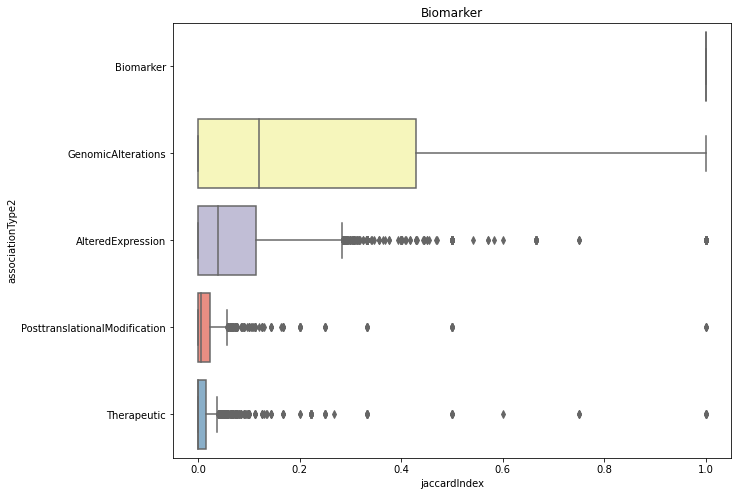

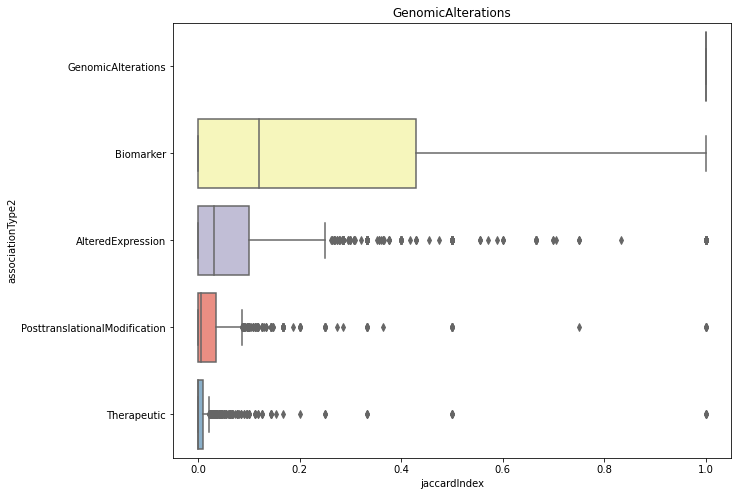

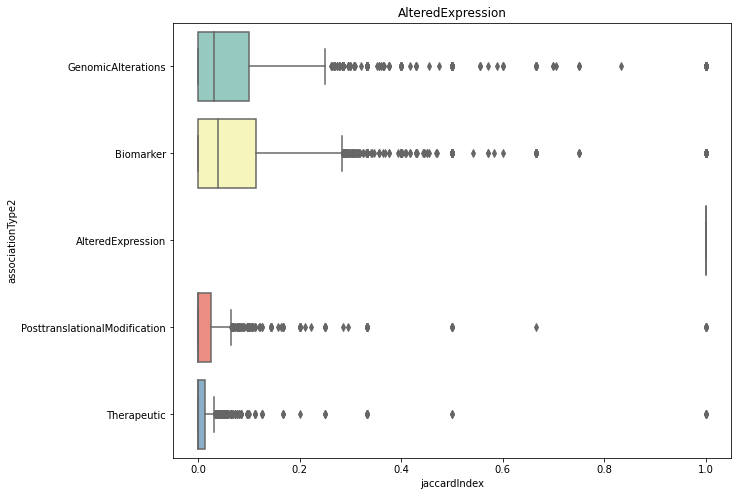

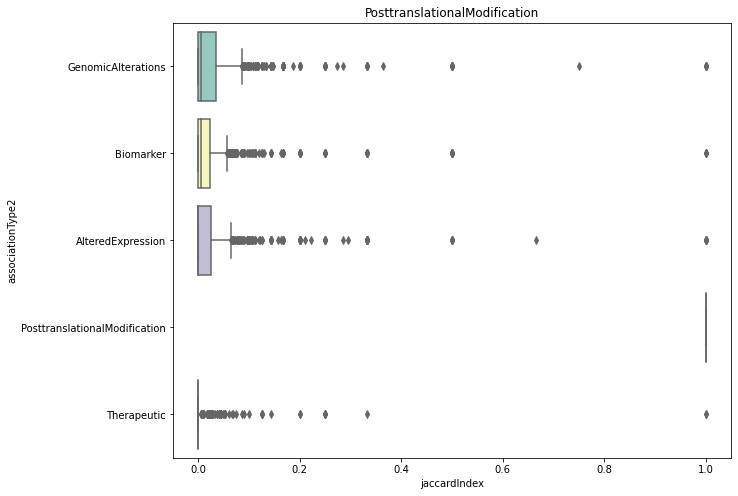

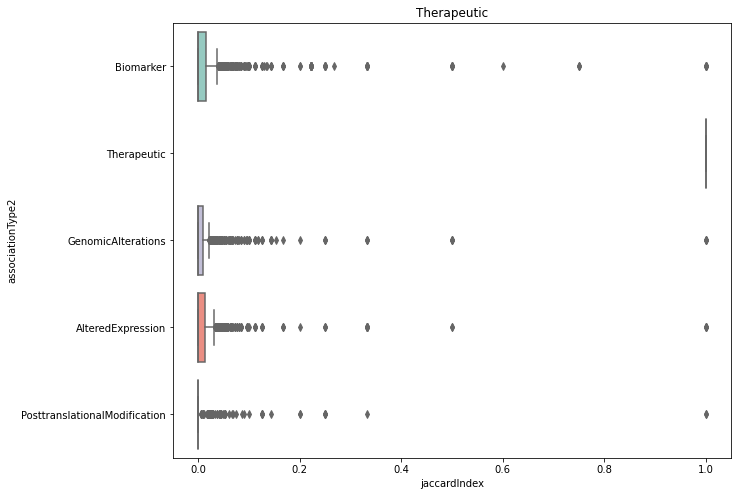

In [35]:
for i, associationType in enumerate(resultGE.associationType1.unique(), 1): #Iterating through each unique association Type
    data = resultGE[resultGE.associationType1 == associationType] #Filtering by association Type
    fig, ax = plt.subplots(figsize = (10,8))
    sns.boxplot(x = 'jaccardIndex', y = 'associationType2',
                 data = data, palette="Set3", orient = 'h')
    plt.title(associationType)

In [36]:
# Reorganizing the Dataset to Obtain the Median Values for Each Association Type Combination:
# This new dataset will have one row for each association type combination, a set of the jaccard Indices for that association type combination, and a median of the values for each of those sets. Those median values are what will be placed in the heatmap
resultGE2 = resultGE.drop(columns = ['diseaseNID', 'geneNID1', 'geneNID2'])
resultGE2 = resultGE2.groupby(by = ['associationType1', 'associationType2'])['jaccardIndex'].apply(lambda x: list(x))
resultGE2 = resultGE2.reset_index()

In [37]:
jaccardsets = resultGE2['jaccardIndex']
medians = []
for set in jaccardsets:
    medians.append(statistics.median(set))
resultGE2['Median'] = medians
resultGE2

,associationType1,associationType2,jaccardIndex,Median
0,AlteredExpression,AlteredExpression,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000
1,AlteredExpression,Biomarker,"[0.1111111111111111, 0.02456140350877193, 0.06...",0.039286
2,AlteredExpression,GenomicAlterations,"[0.0, 0.022727272727272728, 0.0857142857142857...",0.030303
3,AlteredExpression,PosttranslationalModification,"[0.0, 0.0, 0.0, 0.037440435670524165, 0.035190...",0.000000
4,AlteredExpression,Therapeutic,"[0.0, 0.016666666666666666, 0.0, 0.0, 0.002118...",0.000000
5,Biomarker,AlteredExpression,"[0.1111111111111111, 0.02456140350877193, 0.06...",0.039286
6,Biomarker,Biomarker,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000
7,Biomarker,GenomicAlterations,"[0.009708737864077669, 0.0, 0.0343642611683848...",0.120000
8,Biomarker,PosttranslationalModification,"[0.0073964497041420114, 0.0, 0.018867924528301...",0.006090
9,Biomarker,Therapeutic,"[0.0, 0.0, 0.006289308176100629, 0.03703703703...",0.000000


### Recategorized Dataset Heatmap with Non-Unique Biomarker Rows Median:

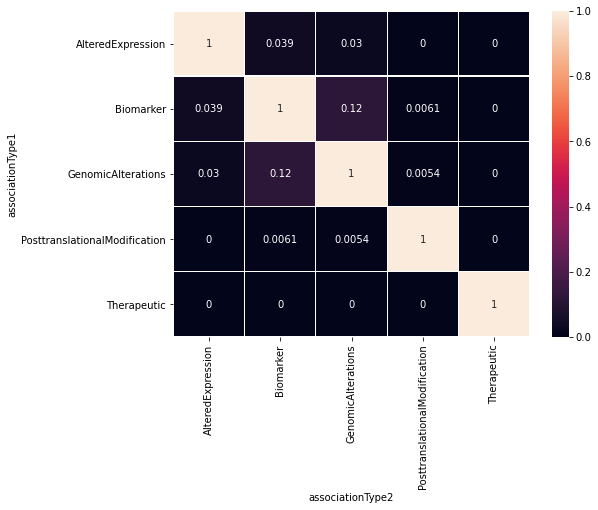

In [38]:
resultGE3 = resultGE2.pivot("associationType1", "associationType2", "Median")
fig, ax = plt.subplots(figsize=(8,6))   
ax = sns.heatmap(resultGE3, annot = True, linewidths = .25)

In [39]:
resultGE

,diseaseNID,associationType1,associationType2,geneNID1,geneNID2,jaccardIndex
0,1,Biomarker,Biomarker,"{1088, 3070}","{1088, 3070}",1.000000
1,2,Biomarker,Biomarker,{10721},{10721},1.000000
2,3,GenomicAlterations,GenomicAlterations,"{4711, 6417, 5458, 1813, 3065, 17182}","{4711, 6417, 5458, 1813, 3065, 17182}",1.000000
3,3,GenomicAlterations,Biomarker,"{4711, 6417, 5458, 1813, 3065, 17182}","{522, 525, 7694, 5650, 5139, 11283, 12826, 156...",0.009709
4,3,Biomarker,GenomicAlterations,"{522, 525, 7694, 5650, 5139, 11283, 12826, 156...","{4711, 6417, 5458, 1813, 3065, 17182}",0.009709
...,...,...,...,...,...,...
139796,30292,Biomarker,AlteredExpression,"{18471, 1738, 3551, 9805, 46, 270, 19792, 6738...","{3833, 11963, 2493, 270}",0.058824
139797,30292,AlteredExpression,GenomicAlterations,"{3833, 11963, 2493, 270}","{2403, 1738, 9805, 270, 6738, 3829, 4057}",0.100000
139798,30292,AlteredExpression,Biomarker,"{3833, 11963, 2493, 270}","{18471, 1738, 3551, 9805, 46, 270, 19792, 6738...",0.058824
139799,30292,AlteredExpression,AlteredExpression,"{3833, 11963, 2493, 270}","{3833, 11963, 2493, 270}",1.000000


In [56]:
def count(list1, list2):
    #length = len[list(set(list1)) & list(set(list2))]
    #return length
    return len((list1) & (list2))

In [57]:
def g(x):
    return count(x['geneNID1'], x['geneNID2']) 

In [42]:
resultGE['CountG'] = np.nan

In [58]:
resultGE['CountG'] = resultGE.apply(g, axis = 1)
resultGE

,diseaseNID,associationType1,associationType2,geneNID1,geneNID2,jaccardIndex,CountG
0,1,Biomarker,Biomarker,"{1088, 3070}","{1088, 3070}",1.000000,2
1,2,Biomarker,Biomarker,{10721},{10721},1.000000,1
2,3,GenomicAlterations,GenomicAlterations,"{4711, 6417, 5458, 1813, 3065, 17182}","{4711, 6417, 5458, 1813, 3065, 17182}",1.000000,6
3,3,GenomicAlterations,Biomarker,"{4711, 6417, 5458, 1813, 3065, 17182}","{522, 525, 7694, 5650, 5139, 11283, 12826, 156...",0.009709,1
4,3,Biomarker,GenomicAlterations,"{522, 525, 7694, 5650, 5139, 11283, 12826, 156...","{4711, 6417, 5458, 1813, 3065, 17182}",0.009709,1
...,...,...,...,...,...,...,...
139796,30292,Biomarker,AlteredExpression,"{18471, 1738, 3551, 9805, 46, 270, 19792, 6738...","{3833, 11963, 2493, 270}",0.058824,1
139797,30292,AlteredExpression,GenomicAlterations,"{3833, 11963, 2493, 270}","{2403, 1738, 9805, 270, 6738, 3829, 4057}",0.100000,1
139798,30292,AlteredExpression,Biomarker,"{3833, 11963, 2493, 270}","{18471, 1738, 3551, 9805, 46, 270, 19792, 6738...",0.058824,1
139799,30292,AlteredExpression,AlteredExpression,"{3833, 11963, 2493, 270}","{3833, 11963, 2493, 270}",1.000000,4


In [60]:
# Reorganizing the Dataset to Obtain the Median Values for Each Association Type Combination:
# This new dataset will have one row for each association type combination, a set of the jaccard Indices for that association type combination, and a median of the values for each of those sets. Those median values are what will be placed in the heatmap
resultGE4 = resultGE.drop(columns = ['diseaseNID', 'geneNID1', 'geneNID2'])
resultGE4 = resultGE4.groupby(by = ['associationType1', 'associationType2'])['jaccardIndex'].apply(lambda x: list(x))
resultGE4 = resultGE4.reset_index()
resultGE4

,associationType1,associationType2,jaccardIndex
0,AlteredExpression,AlteredExpression,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,AlteredExpression,Biomarker,"[0.1111111111111111, 0.02456140350877193, 0.06..."
2,AlteredExpression,GenomicAlterations,"[0.0, 0.022727272727272728, 0.0857142857142857..."
3,AlteredExpression,PosttranslationalModification,"[0.0, 0.0, 0.0, 0.037440435670524165, 0.035190..."
4,AlteredExpression,Therapeutic,"[0.0, 0.016666666666666666, 0.0, 0.0, 0.002118..."
5,Biomarker,AlteredExpression,"[0.1111111111111111, 0.02456140350877193, 0.06..."
6,Biomarker,Biomarker,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
7,Biomarker,GenomicAlterations,"[0.009708737864077669, 0.0, 0.0343642611683848..."
8,Biomarker,PosttranslationalModification,"[0.0073964497041420114, 0.0, 0.018867924528301..."
9,Biomarker,Therapeutic,"[0.0, 0.0, 0.006289308176100629, 0.03703703703..."


In [61]:
resultGE5 = resultGE.groupby(by = ['associationType1', 'associationType2'])['CountG'].apply(lambda x: list(x))
resultGE5 = resultGE5.reset_index()
resultGE5

,associationType1,associationType2,CountG
0,AlteredExpression,AlteredExpression,"[2, 18, 13, 132, 8, 1, 1, 17, 17, 9, 1, 8, 1, ..."
1,AlteredExpression,Biomarker,"[1, 7, 3, 53, 0, 0, 0, 1, 4, 1, 0, 1, 3, 0, 5,..."
2,AlteredExpression,GenomicAlterations,"[0, 1, 3, 44, 0, 1, 0, 0, 2, 0, 1, 1, 3, 0, 0,..."
3,AlteredExpression,PosttranslationalModification,"[0, 0, 0, 55, 24, 0, 0, 1, 0, 1, 6, 1, 1, 0, 0..."
4,AlteredExpression,Therapeutic,"[0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
5,Biomarker,AlteredExpression,"[1, 7, 3, 53, 0, 0, 0, 1, 4, 1, 0, 1, 3, 0, 5,..."
6,Biomarker,Biomarker,"[2, 1, 98, 2, 8, 274, 39, 673, 4, 17, 170, 2, ..."
7,Biomarker,GenomicAlterations,"[1, 0, 10, 9, 206, 3, 4, 1, 3, 4, 21, 0, 5, 0,..."
8,Biomarker,PosttranslationalModification,"[5, 0, 1, 56, 24, 1, 0, 2, 0, 1, 5, 2, 2, 0, 0..."
9,Biomarker,Therapeutic,"[0, 0, 1, 1, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."


In [64]:
resultGE4 = resultGE4.merge(resultGE5)

In [65]:
resultGE4

,associationType1,associationType2,jaccardIndex,Median,CountG
0,AlteredExpression,AlteredExpression,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,"[2, 18, 13, 132, 8, 1, 1, 17, 17, 9, 1, 8, 1, ..."
1,AlteredExpression,Biomarker,"[0.1111111111111111, 0.02456140350877193, 0.06...",0.039286,"[1, 7, 3, 53, 0, 0, 0, 1, 4, 1, 0, 1, 3, 0, 5,..."
2,AlteredExpression,GenomicAlterations,"[0.0, 0.022727272727272728, 0.0857142857142857...",0.030303,"[0, 1, 3, 44, 0, 1, 0, 0, 2, 0, 1, 1, 3, 0, 0,..."
3,AlteredExpression,PosttranslationalModification,"[0.0, 0.0, 0.0, 0.037440435670524165, 0.035190...",0.000000,"[0, 0, 0, 55, 24, 0, 0, 1, 0, 1, 6, 1, 1, 0, 0..."
4,AlteredExpression,Therapeutic,"[0.0, 0.016666666666666666, 0.0, 0.0, 0.002118...",0.000000,"[0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
5,Biomarker,AlteredExpression,"[0.1111111111111111, 0.02456140350877193, 0.06...",0.039286,"[1, 7, 3, 53, 0, 0, 0, 1, 4, 1, 0, 1, 3, 0, 5,..."
6,Biomarker,Biomarker,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,"[2, 1, 98, 2, 8, 274, 39, 673, 4, 17, 170, 2, ..."
7,Biomarker,GenomicAlterations,"[0.009708737864077669, 0.0, 0.0343642611683848...",0.120000,"[1, 0, 10, 9, 206, 3, 4, 1, 3, 4, 21, 0, 5, 0,..."
8,Biomarker,PosttranslationalModification,"[0.0073964497041420114, 0.0, 0.018867924528301...",0.006090,"[5, 0, 1, 56, 24, 1, 0, 2, 0, 1, 5, 2, 2, 0, 0..."
9,Biomarker,Therapeutic,"[0.0, 0.0, 0.006289308176100629, 0.03703703703...",0.000000,"[0, 0, 1, 1, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."


In [66]:
countsets = resultGE4['CountG']
medians = []
for set in countsets:
    medians.append(statistics.median(set))
resultGE4['MedianCount'] = medians
resultGE4

,associationType1,associationType2,jaccardIndex,Median,CountG,MedianCount
0,AlteredExpression,AlteredExpression,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,"[2, 18, 13, 132, 8, 1, 1, 17, 17, 9, 1, 8, 1, ...",3.0
1,AlteredExpression,Biomarker,"[0.1111111111111111, 0.02456140350877193, 0.06...",0.039286,"[1, 7, 3, 53, 0, 0, 0, 1, 4, 1, 0, 1, 3, 0, 5,...",1.0
2,AlteredExpression,GenomicAlterations,"[0.0, 0.022727272727272728, 0.0857142857142857...",0.030303,"[0, 1, 3, 44, 0, 1, 0, 0, 2, 0, 1, 1, 3, 0, 0,...",1.0
3,AlteredExpression,PosttranslationalModification,"[0.0, 0.0, 0.0, 0.037440435670524165, 0.035190...",0.000000,"[0, 0, 0, 55, 24, 0, 0, 1, 0, 1, 6, 1, 1, 0, 0...",0.0
4,AlteredExpression,Therapeutic,"[0.0, 0.016666666666666666, 0.0, 0.0, 0.002118...",0.000000,"[0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...",0.0
5,Biomarker,AlteredExpression,"[0.1111111111111111, 0.02456140350877193, 0.06...",0.039286,"[1, 7, 3, 53, 0, 0, 0, 1, 4, 1, 0, 1, 3, 0, 5,...",1.0
6,Biomarker,Biomarker,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,"[2, 1, 98, 2, 8, 274, 39, 673, 4, 17, 170, 2, ...",3.0
7,Biomarker,GenomicAlterations,"[0.009708737864077669, 0.0, 0.0343642611683848...",0.120000,"[1, 0, 10, 9, 206, 3, 4, 1, 3, 4, 21, 0, 5, 0,...",1.0
8,Biomarker,PosttranslationalModification,"[0.0073964497041420114, 0.0, 0.018867924528301...",0.006090,"[5, 0, 1, 56, 24, 1, 0, 2, 0, 1, 5, 2, 2, 0, 0...",1.0
9,Biomarker,Therapeutic,"[0.0, 0.0, 0.006289308176100629, 0.03703703703...",0.000000,"[0, 0, 1, 1, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",0.0


In [69]:
meansets = resultGE4['jaccardIndex']
means = []
for set in meansets:
    means.append(statistics.mean(set))
resultGE4['Mean'] = means
resultGE4

,associationType1,associationType2,jaccardIndex,Median,CountG,MedianCount,Mean
0,AlteredExpression,AlteredExpression,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,"[2, 18, 13, 132, 8, 1, 1, 17, 17, 9, 1, 8, 1, ...",3.0,1.000000
1,AlteredExpression,Biomarker,"[0.1111111111111111, 0.02456140350877193, 0.06...",0.039286,"[1, 7, 3, 53, 0, 0, 0, 1, 4, 1, 0, 1, 3, 0, 5,...",1.0,0.084805
2,AlteredExpression,GenomicAlterations,"[0.0, 0.022727272727272728, 0.0857142857142857...",0.030303,"[0, 1, 3, 44, 0, 1, 0, 0, 2, 0, 1, 1, 3, 0, 0,...",1.0,0.079792
3,AlteredExpression,PosttranslationalModification,"[0.0, 0.0, 0.0, 0.037440435670524165, 0.035190...",0.000000,"[0, 0, 0, 55, 24, 0, 0, 1, 0, 1, 6, 1, 1, 0, 0...",0.0,0.027549
4,AlteredExpression,Therapeutic,"[0.0, 0.016666666666666666, 0.0, 0.0, 0.002118...",0.000000,"[0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...",0.0,0.021436
5,Biomarker,AlteredExpression,"[0.1111111111111111, 0.02456140350877193, 0.06...",0.039286,"[1, 7, 3, 53, 0, 0, 0, 1, 4, 1, 0, 1, 3, 0, 5,...",1.0,0.084805
6,Biomarker,Biomarker,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,"[2, 1, 98, 2, 8, 274, 39, 673, 4, 17, 170, 2, ...",3.0,1.000000
7,Biomarker,GenomicAlterations,"[0.009708737864077669, 0.0, 0.0343642611683848...",0.120000,"[1, 0, 10, 9, 206, 3, 4, 1, 3, 4, 21, 0, 5, 0,...",1.0,0.282661
8,Biomarker,PosttranslationalModification,"[0.0073964497041420114, 0.0, 0.018867924528301...",0.006090,"[5, 0, 1, 56, 24, 1, 0, 2, 0, 1, 5, 2, 2, 0, 0...",1.0,0.022777
9,Biomarker,Therapeutic,"[0.0, 0.0, 0.006289308176100629, 0.03703703703...",0.000000,"[0, 0, 1, 1, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",0.0,0.026303


# Mean/Effect of Outliers using Original Biomarker Rows:
### Recategorized Dataset Heatmap with Non-Unique Biomarker Rows Mean:


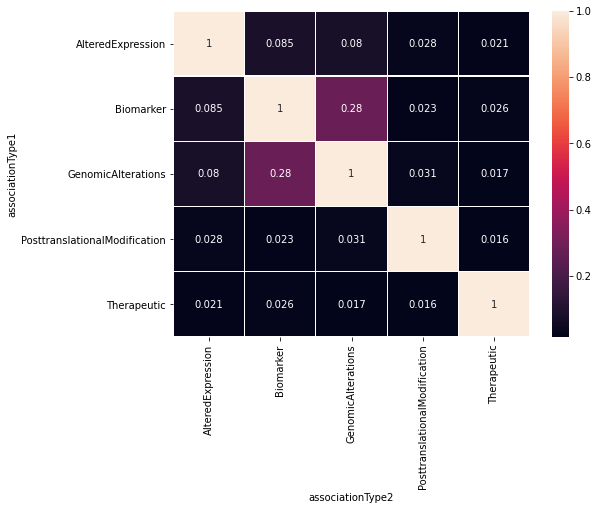

In [71]:
resultGE5 = resultGE4.pivot("associationType1", "associationType2", "Mean")
fig, ax = plt.subplots(figsize=(8,6))   
ax = sns.heatmap(resultGE5, annot = True, linewidths = .25)

In [67]:
resultGE4.to_csv('resultGE4.csv', index = False)

In [68]:
resultGE3 = resultGE2.pivot("associationType1", "associationType2", "Median")
fig, ax = plt.subplots(figsize=(8,6))   
ax = sns.heatmap(resultGE3, annot = True, linewidths = .25)

TypeError: pivot() takes from 1 to 4 positional arguments but 5 were given